# Analyzing Customer Behavior and Predicting Churn in the Telecommunication Firm

## Project Outline

### Business Understanding
- General Telecommunication Customer Churn Overview
- Objectives
- Hypothesis
- Analytical Questions


### Data Understanding
- import packages
- Load Data
- EDA (check head, shape, info, describe, duplicates, null values etc)
- Univariate Analysis (Histogram, Box plots, outlier checks, density plots)
- Bivariate Analysis (Pair plots, Correlation Heatmap, Bar charts & Boxplots)
- Answer Analytical questions
- Test hypothesis

### Data Preparation
- Check if dataset is ballanced (Visualisation)
- Encoding y and categorical variables
- Split data into x and y, (training and evaluation)
- Treat imbalance by oversampling X and y

### Modelling & Evaluations
- Chose models to train (distance, gradient descent, tree based +)
- Train on unbalanced dataset
- Train on balanced dataset
- Hyperparemeter tuning
- Model persistance



## BUSINESS UNDERSTANDING

#### General Telecommunication Customer Churn Overview

In the 2022 State of Customer Churn in Telecom survey, it was found that customer loyalty to telecom providers is down 22% post-pandemic, with customer stickiness being impacted more by the customer experience than ever. Further, customers are now more price sensitive, with 58% perceiving telco offerings as expensive.
[Source](https://www.akkio.com/beginners-guide-to-machine-learning?utm_source=Akkio&utm_medium=content-marketing&utm_content=telecom-customer-churn)

Some reasons for churn in telecoms
It emerged that churn in the telecom industry is most often due to high customer effort. Customers canceled their contracts for the following reasons:

- Companies wasted their time (37% waited too long to have their issue resolved)
- Chey had to call more than once (51%)
- Untrained or incompetent agents (37% thought the reps were rude or had a negative approach)
- Inferior self-service options (14%).
[Source](https://techsee.me/resources/reports/2019-telecom-churn-survey/#:~:text=Primary%20reasons%20for%20churn%20in,more%20than%20once%20(51%25))

Machine learning can be a powerful tool for telcos to predict customer churn and keep their customer base. ML is used across many industries, and its application in the telecommunications industry is no different. Machine learning is one way of achieving artificial intelligence.
[Source](https://www.akkio.com/beginners-guide-to-machine-learning?utm_source=Akkio&utm_medium=content-marketing&utm_content=telecom-customer-churn)



#### OBJECTIVES
- In this project, task is to develop a Classification Machine learning model to predict whether a new Telco customer will churn or not churn.
- To understand the dataset and find the lifeline value of each cutomer and determine which factors affect the rate at which customers stop using their network.

#### Datasets
Three datasets from three different sources have been provided for our Machine Learning Modelling
- The first 3000 records of the dataset will be accessed remotely in a database hosted in a Microsoft SQL Server.
- The second part of the data is hosted on a GitHub repository in a file named LP2_Telco-churn-second-2000.csv
- The third part of the dataset with 2000 records named Telco-churn-last-2000.xlsx was found in a OneDrive folder, this dataset has no labels and will be used to test our machine learning model.

##### Data Dictionary


 - **customerID**        - Uniquely identify each customer
 - **gender**            - whether a customer is a Male or Female
 - **SeniorCitizen**     - whether customer is >60 years or not (Yes or No)
 - **Partner**           - Whether customer have a partner or not (Yes or No)
 - **Dependents**        - Whether customer have a dependents or not (Yes or No)
 - **tenure**            - How many months customer has been on the network
 - **PhoneService**      - Whether the customer is satisfied with the phone services
 - **MultipleLines**     - Whether the customer is satisfied with the multiple lines service
 - **InternetService**   - Whether the customer is satisfied with the internet service
 - **OnlineSecurity**    - whether the customer is satisfied with the online security service
 - **OnlineBackup**      - Whether the customer is satisfied with the onlince backup service
 - **DeviceProtection**  - Whether the customer is satisfied with the device protection service
 - **TechSupport**       - Whether the customer is satisfied with the tech support service
 - **StreamingTV**       - Whether the customer is satisfied with the streaming TV service
 - **StreamingMovies**   - Whether the customer is satisfied with the streaming Movies service
 - **Contract**          - Whether the customer opted for month-to-month, one-year and two-years contract with the Telco
 - **PaperlessBilling**  - Whether the customer is satisfied with the Paperless Billing service
 - **PaymentMethod**     - Whether the customer opted for electronic, mailed check, bank transfer and credit card payment methods
 - **MonthlyCharges**    - Monthly customer charges
 - **TotalCharges**      - Yearly customer charges
 - **Churn**             - Whether a customer will stop using the Telco's network or not (Yes and No)


#### ANALYTICAL QUESTIONS

The following analytical questions will help us gain insight and as well as confirm our hypothesis

1. How long Female and Male spent with Telco before Churning

2. What is the trend between Contract and churn

3. How long does it take each contract type before Churning

3. Which method of payment was prefered among the Senior Citizens and how much in total did both senior and non Senior citizens paid before churning

4. What is the churn trend for gender and dependents as well as their tenure

5. what is the trend between payment methods and gender and how it affect churning

6. What is the trend between tenure and paperlessBilling in relation to churn

7. What is the trend between tenure, Internet Service and senior citizen in relation to churn

8. What is the trend between StreamingMovies and senior citizen in relation to churn

9. How does internetService and OnlineSecurity affect churn

10. What is the trend between Contract and Payment Method in relation to churn


#### HYPOTHESIS

The following hypothesis will be tested

1. The average amount of TotalCharges for customers that churn is greater than or equal to those that did not churn

2.  The average number of churn for customers that have Month_to_Month contract is greater than or equal to those with 'One year' contract

3.  Gender does not influence customer churn

4.  The Internet service does not influence customer churn

5.  The average number of tenure for customers that churn is less than or equal to those that did not churn

6.  There is no significant difference in the mean TotalCharges across different levels of the categorical variable PaymentMethod.

7.  The Payment Method does not influence customer churn




### Data Understanding

#### - Import all the necessary packages

In [58]:
import pyodbc    
from dotenv import dotenv_values

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#import plotly.express as px

from scipy.stats import ttest_ind
from sklearn.feature_selection import chi2
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from custom_imputer import CustomImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder, 
    LabelEncoder, 
    RobustScaler, 
    StandardScaler,
    FunctionTransformer
)

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier, 
    GradientBoostingClassifier
)
from catboost import CatBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_curve,
    auc, 
    confusion_matrix, 
    classification_report
)

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV
from scipy.stats import chi2_contingency
import pingouin as pg



import warnings
warnings.filterwarnings('ignore')

### Loading Datasets

#### Create a connection by accessing your connection string with your defined environment variables

In [59]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [60]:
#connection = pyodbc.connect(connection_string)

In [61]:
#Reading data from SQL server
#query = "Select * from dbo.LP2_Telco_churn_first_3000"

#telco_churn_sql = pd.read_sql(query, connection)
telco_churn_sql=pd.read_csv('Dataset/Telco_churn_sql.csv')

In [62]:
#dataset fromGitHub

telco_churn_git=pd.read_csv('Dataset/Telco_churn_git.csv')

In [63]:
churn_sql=telco_churn_sql.copy()
churn_git= telco_churn_git.copy() 


In [64]:
churn_sql.head(2)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [65]:
churn_git.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.0,1046.5,Yes


### EDA

In [66]:
# size of churn_sql
churn_sql.shape

(3000, 22)

In [67]:
# size of churn_git
churn_git.shape

(2043, 21)

In [68]:
# Information on churn_sql
churn_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3000 non-null   int64  
 1   customerID        3000 non-null   object 
 2   gender            3000 non-null   object 
 3   SeniorCitizen     3000 non-null   bool   
 4   Partner           3000 non-null   bool   
 5   Dependents        3000 non-null   bool   
 6   tenure            3000 non-null   int64  
 7   PhoneService      3000 non-null   bool   
 8   MultipleLines     2731 non-null   object 
 9   InternetService   3000 non-null   object 
 10  OnlineSecurity    2349 non-null   object 
 11  OnlineBackup      2349 non-null   object 
 12  DeviceProtection  2349 non-null   object 
 13  TechSupport       2349 non-null   object 
 14  StreamingTV       2349 non-null   object 
 15  StreamingMovies   2349 non-null   object 
 16  Contract          3000 non-null   object 


In [69]:
# Information on churn_git
churn_git.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


**Observations**
- Both datasets have the same number of columns and the same column names
- The data from SQL have 5 bool, 2 float, 1 int64 and 13 object data types
- The data from GitHub have 1 float, 2 int64, and 18 object
- The column SeniorCitizen is a bool in dataset from SQL and and int64 in the dataset from GitHub, all will be converted to an object type for visualization purposes, they will be encoded later for machine learning



**Investigating and correcting columns with wrong data types**

In [70]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

churn_sql.head(2)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [71]:
churn_git.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.0,1046.5,Yes


**Observations**

- We can observe that all the following columns in the dataset from SQL (telco_churn_sql) **SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling and Churn** contains **True and False** values where as the same columns in dataset from Github (telco_churn_git) apart from **SeniorCitizen** which is made up of categoricals (0 & 1), all others contains **Yes and No**, in order to concatenate both dataframes into one dataset, we will have to assign **True to Yes and False to No**, as well as correct the data types accordingly.

- **tenure** in bothe datasets is int64 type

- **MonthlyCharges** in bothe datasets is float type, which is correct after investigating the values.

- **TotalCharges** is a float in telco_churn_sql dataset where as it is an object type in telco_churn_git, upon investigating the values it is supposed to be a float type, we will therefore rectify this before concatenating the datasets.
- The column **SeniorCitizen** is a bool in dataset from SQL and and int64 in the dataset from GitHub, all will be converted to an object type for visualization purposes, they will be encoded later for machine learning

**Checking if there are duplicates in the datasets**

In [72]:
# finding Duplicates values
print(f'The number of duplicate rows in dataset from SQL is: {churn_sql.duplicated().sum()}\nThe number of duplicate rows in dataset from GitHub is: {churn_git.duplicated().sum()}')

The number of duplicate rows in dataset from SQL is: 0
The number of duplicate rows in dataset from GitHub is: 0


**Checking if there are missing values in the datasets**

In [73]:
# finding missing values
print(f'Missing values in dataset from SQL: \n{churn_sql.isna().sum()} \n\nMissing values in dataset from GitHub: \n{churn_git.isna().sum()}')

Missing values in dataset from SQL: 
Unnamed: 0            0
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64 

Missing values in dataset from GitHub: 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
Paymen

In [74]:
# Statistics for dataset
churn_sql.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,3000.0,NaN,NaN,NaN,1499.5,866.169729,0.0,749.75,1499.5,2249.25,2999.0
customerID,3000,3000,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,3000,2,Male,1537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,3000,2,False,2525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,3000,2,False,1538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,3000,2,False,2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,3000.0,NaN,NaN,NaN,32.527333,24.637768,0.0,9.0,29.0,56.0,72.0
PhoneService,3000,2,True,2731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,2731,2,False,1437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,3000,3,Fiber optic,1343,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# assigning columns with bool type to columns_to_convert
columns_to_convert = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Convert columns with bool type to object (str)
churn_sql[columns_to_convert] = churn_sql[columns_to_convert].astype(str)


In [76]:
#Selecting only object types to apply function on
object_columns = churn_sql.select_dtypes(include=['object'])

#droping columns we will not want to apply function to
object_columns = object_columns.drop(['customerID', 'gender', 'InternetService', 'Contract', 'PaymentMethod'], axis=1)

#Function to replace True with Yes and False with No
for column in object_columns:
    churn_sql[column]=churn_sql[column].astype(str).fillna('No').apply(lambda x: 'Yes' if 'true' in x.lower() else 'No')

In [77]:
churn_sql.head(3)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes


In [78]:
#Replacing 1 with Yes and O with No
churn_git['SeniorCitizen']=churn_git['SeniorCitizen'].astype(str).apply(lambda x: 'Yes' if '1' in x.lower() else 'No')

In [79]:
churn_git.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,No,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,No,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,No,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


In [80]:
#investigating why getting error trying to change type
churn_git['TotalCharges'].iloc[218]

' '

In [81]:
#Replacing the ' ' with nothing
churn_git['TotalCharges']=churn_git['TotalCharges'].str.replace(' ','')

In [82]:
churn_git['TotalCharges'].iloc[218]

''

In [83]:
#Changing type from object to float
churn_git['TotalCharges']=pd.to_numeric(churn_git['TotalCharges'])

In [84]:
churn_git.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   object 
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


**Concatenating dataframes**

In [85]:
# Concatenation the two dataset
df_churn= pd.concat([churn_sql, churn_git])

In [86]:
# retrieving the first 5 rows
df_churn.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,1.0,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,2.0,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,3.0,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,4.0,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [87]:
# dropping the column name 'unnamed:0'
df_churn = df_churn.drop(columns='Unnamed: 0')

In [88]:
# size of our dataframe
df_churn.shape

(5043, 21)

In [89]:
# information on the dataframe
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [90]:
# descriptive statistics for the dataframe
df_churn.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,5043,5043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,5043,2,Male,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,5043,2,No,4224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,5043,2,No,2585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,5043,2,No,3482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,5043.0,NaN,NaN,NaN,32.576641,24.529807,0.0,9.0,29.0,56.0,72.0
PhoneService,5043,2,Yes,4554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,5043,3,No,2693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,5043,3,Fiber optic,2248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,5043,3,No,3158,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Retrieving all categorical data and dropping customer Id
object_columns = df_churn.select_dtypes(include=['object'])
object_columns = object_columns.drop('customerID', axis=1)

#retrieving the unique values for each categorical column
for column in object_columns:
    unique_values=df_churn[column].unique()
    print(f'\n{column}\n{sorted(unique_values)}\n')


gender
['Female', 'Male']


SeniorCitizen
['No', 'Yes']


Partner
['No', 'Yes']


Dependents
['No', 'Yes']


PhoneService
['No', 'Yes']


MultipleLines
['No', 'No phone service', 'Yes']


InternetService
['DSL', 'Fiber optic', 'No']


OnlineSecurity
['No', 'No internet service', 'Yes']


OnlineBackup
['No', 'No internet service', 'Yes']


DeviceProtection
['No', 'No internet service', 'Yes']


TechSupport
['No', 'No internet service', 'Yes']


StreamingTV
['No', 'No internet service', 'Yes']


StreamingMovies
['No', 'No internet service', 'Yes']


Contract
['Month-to-month', 'One year', 'Two year']


PaperlessBilling
['No', 'Yes']


PaymentMethod
['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']


Churn
['No', 'Yes']



- We observe that **MultipleLines**, **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV** and **StreamingMovies** contains unusual unique values

- for **InternetService** it is possible to have **No** if customer have no internet access

these unsual unique values will be investigated further and replace with apprioprate value in neccessary  

In [92]:
#retrieving the rows with 'no phone service' under 'multiple lines' column
multilines_no_ph_ser=df_churn[df_churn['MultipleLines']=='No phone service']
multilines_no_ph_ser.shape

(220, 21)

- Usually if your phone shows a "No Service" message, it means that your device cannot find a signal from your cellular carrier and you cannot make calls, send texts, and other normal functions.
- Since this is similar to not having a line at all, **No phone service** will be replced by **No**

In [93]:
# replacing the rows with 'no phone service' with no
df_churn['MultipleLines']=df_churn['MultipleLines'].str.replace('No phone service', 'No')

In [94]:
# retrieving rows with 'no internet service' under onlinesecurity
Onlsec_no_intnet_ser=df_churn[df_churn['OnlineSecurity']=='No internet service']
Onlsec_no_intnet_ser.shape

(429, 21)

In [95]:
# Retrieve 10 sample rows 
Onlsec_no_intnet_ser.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
87,8739-QOTTN,Female,No,Yes,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,41.85,No
1153,6685-XSHHU,Male,No,Yes,Yes,60,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.95,1270.55,No
1806,4933-BSAIP,Female,No,Yes,No,40,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.10,780.10,No
1621,6762-NSODU,Female,No,Yes,Yes,46,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.40,958.15,No
733,4817-KEQSP,Female,No,Yes,Yes,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.85,1326.35,No
1321,1577-HKTFG,Female,No,Yes,No,30,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.65,655.85,Yes
408,6407-GSJNL,Female,No,No,No,51,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.95,1288.00,No
633,1222-LRYKO,Male,No,No,Yes,6,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,26.35,184.05,No
1738,3590-TCXTB,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,20.35,No
908,4786-UKSNZ,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,Yes


- We can observe that for all the rows with value of **No internet service** also have **No** as their corresponding **InternetService** column value
- For **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV** and **StreamingMovies** No internet service will mean No to all, **No internet service** will then be replaced with **No**

In [96]:
# function to replace no internet service with no and no phone service
for column in object_columns:
    df_churn[column]=df_churn[column].str.replace('No internet service', 'No')
    df_churn['MultipleLines']=df_churn['MultipleLines'].str.replace('No phone service', 'No')

In [97]:
# retrieve the unique values in categorical column 
for column in object_columns:
    unique_values=df_churn[column].unique()
    print(f'\n{column}\n{sorted(unique_values)}\n')


gender
['Female', 'Male']


SeniorCitizen
['No', 'Yes']


Partner
['No', 'Yes']


Dependents
['No', 'Yes']


PhoneService
['No', 'Yes']


MultipleLines
['No', 'Yes']


InternetService
['DSL', 'Fiber optic', 'No']


OnlineSecurity
['No', 'Yes']


OnlineBackup
['No', 'Yes']


DeviceProtection
['No', 'Yes']


TechSupport
['No', 'Yes']


StreamingTV
['No', 'Yes']


StreamingMovies
['No', 'Yes']


Contract
['Month-to-month', 'One year', 'Two year']


PaperlessBilling
['No', 'Yes']


PaymentMethod
['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']


Churn
['No', 'Yes']



In [98]:
# Checking for duplicates
df_churn.duplicated().sum()

0

In [99]:
# Checking for null values
df_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [100]:
#diving deeper to understand the cause of null
df_churn[df_churn['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.250000,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.750000,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No
218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.700000,NaN,No
1670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,No
1754,2775-SEFEE,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.900000,NaN,No


- We observe 8 missing values in TotalCharges
- We also observe that for all these customers tenure was 0, which means they have not spent one month with the Telco
- Since TotalCharges is the product of tenure and MonthlyCharges,  then TotalCharges for these rows will be 0, hence we will fillna with 0

In [101]:
# Fill up missing values with 0
df_churn['TotalCharges']=df_churn['TotalCharges'].fillna(0)

In [102]:
# check for missing values
df_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Univariate Analysis 

- (Histogram, Box plots, outlier checks, density plots)

In [103]:
#retrieving columns with numerical data types
num_cols=df_churn.select_dtypes(include='number')

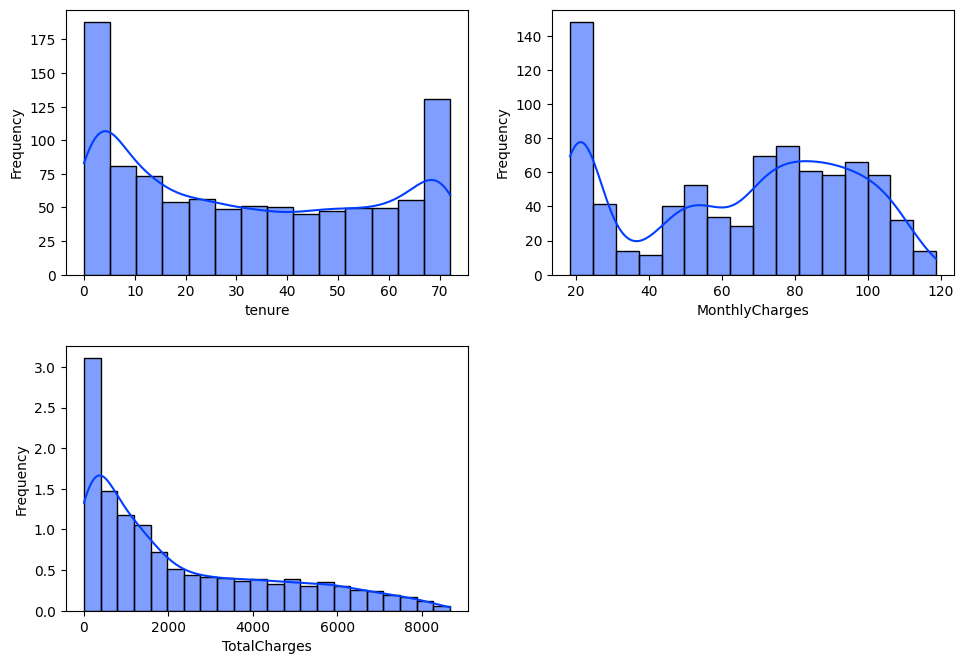

In [104]:
# plot an histogram  visual 

plt.figure(figsize=(10, 7))


for i, variable in enumerate(num_cols):
    plt.subplot(2,2, i + 1)
    sns.histplot(df_churn,x=df_churn[variable],kde=True, stat='frequency')
    plt.tight_layout(pad=2)

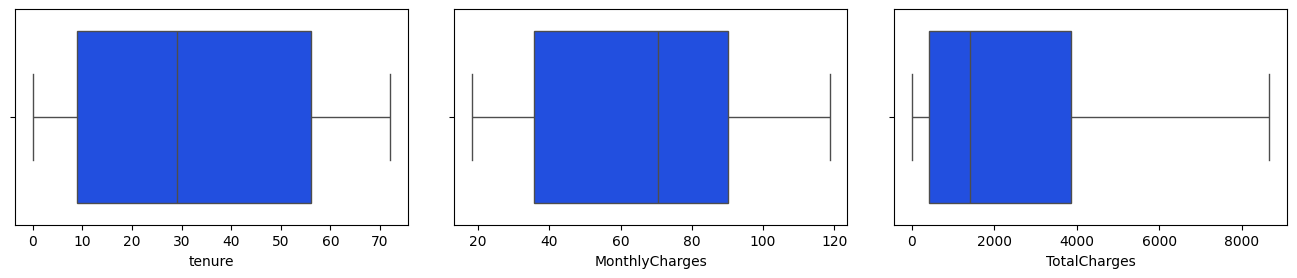

In [105]:
# plotting box plot for numerical data
plt.figure(figsize=(18, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(5,4, i + 1)
    sns.boxplot(df_churn, x=df_churn[variable])
    plt.tight_layout(pad=3)

#### Observations

- From the histogram we noticed that after aproximately the first 5 months of tenure, the count of customers reduced drastically and then start reducing slowly untill about the 55th month it started increasing again, from the boxplot there no outliers and the median is around 30 months aproximately.
- For MonthlyCharges we noticed that most customers are prepared to pay approximately 20 beyond which number of customers dropped, rose after charge 40 and dropped, rose again after approximately charge of 75 and then dropped after charge of 100, from the boxplot there are no outliers.
- For TotalCharge most of the customers number of customers started droping after total amount charge of around 400 and continue dropping untill no one was will to pay extra after around an amount of 10,000, from the boxplot there are no outliers, however TotalCharge is highly skewed to the right.

In [106]:
# retrieving categorical datatype
obj_cols=df_churn.select_dtypes(include='object')

In [107]:
# dropping customer id from the categoprical column
obj_cols=obj_cols.drop('customerID', axis=1)



In [108]:
# retrieving first 2 rows
obj_cols.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No


In [109]:
sns.set_palette('bright')

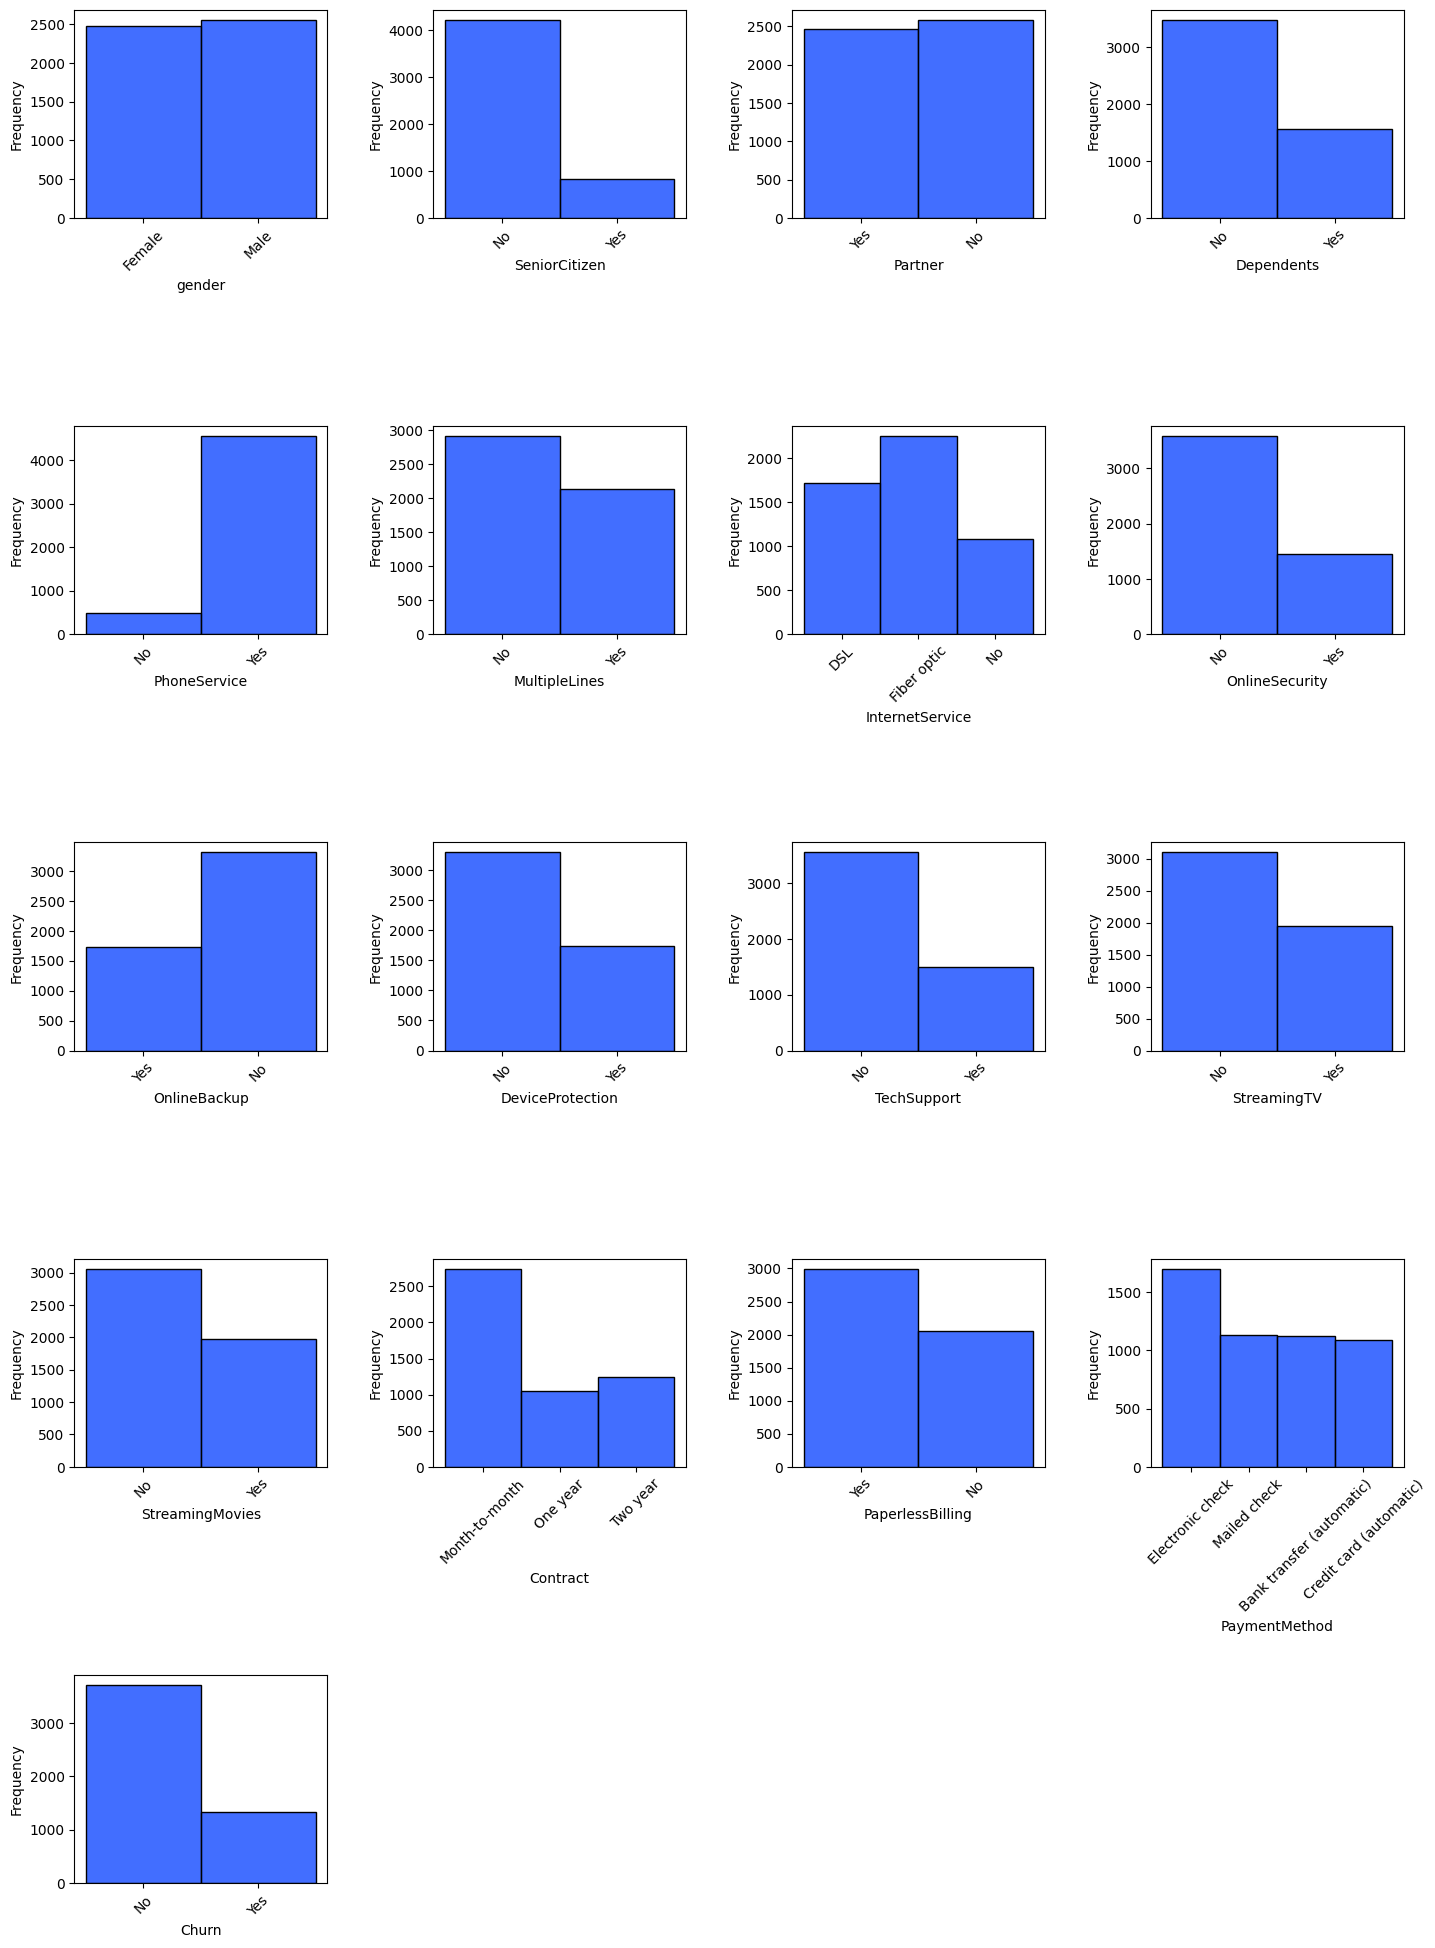

In [110]:
# plotting histogram for obj column

sns.set_palette('bright')

plt.figure(figsize=(15, 20))

for i, variable in enumerate(obj_cols):
    plt.subplot(5,4, i + 1)
    sns.histplot(df_churn,x=df_churn[variable], stat='frequency')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)


#### Observations

- Female and Male are evenly distributed, despite Male being slightly higher
- There are approximately 4000 non senior citizens among the telcos' customers compared to around 500 seniors
- Customers with partners and those without are approximately evenly distributed
- Customers without dependents are more than those with dependents
- Custmers with phone service are more than those without phone service
- Customers without multiple lines are slightly higher than those with multiple lines
- For internet service, more customers are on fibre optic followed by DSL and those with no internet service
- Customers with no online security were more than those with online security
- Customers with no online backup were more than those with online backup
- Customers with no device protection were more than those with device protection
- Customers with no Tech support were more than those with tech support
- Customers with no streaming TV were more than those with streaming TV
- Customers with no streaming Movies were more than those with streaming Movies
- Month to Month contract was more frequent followed by, two year contract and one year contract
- Customers that opted for paperless billing were more than those that did not
- Electronic check was more frequent of the payment methods, whiles the other methods remains evenly distributed
- Customers that did not churn are more than those that churned.

### Bi & Multivariate Analysis

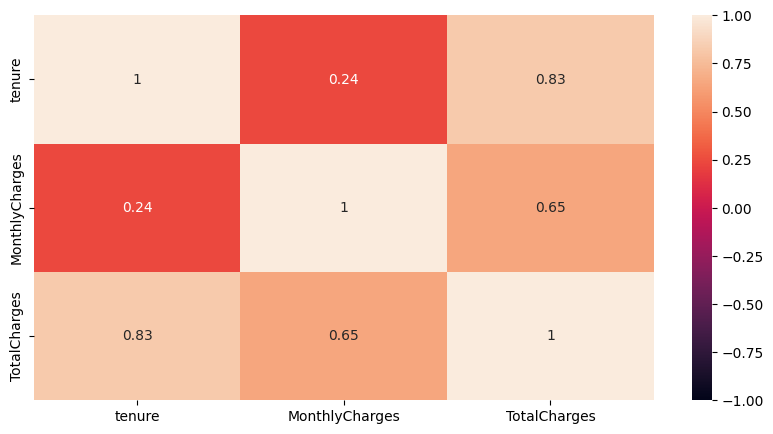

In [111]:
# plotting heatmap for numerical correlation
plt.figure(figsize=(10, 5))
sns.heatmap(num_cols.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

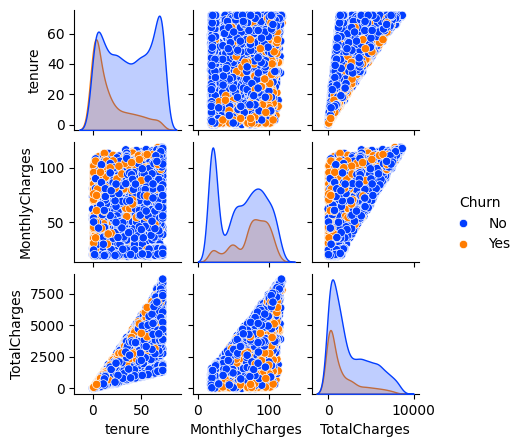

In [112]:
# plotting a pair plot visual 
sns.pairplot(df_churn, hue='Churn', height=1.5)
plt.show()

- TotalCharges and tenure are highly positively correlated
- Totalcharges and monthlycharges are also higly correlated

In [113]:
# dropping customer id
col_no_id=df_churn.drop(columns='customerID')

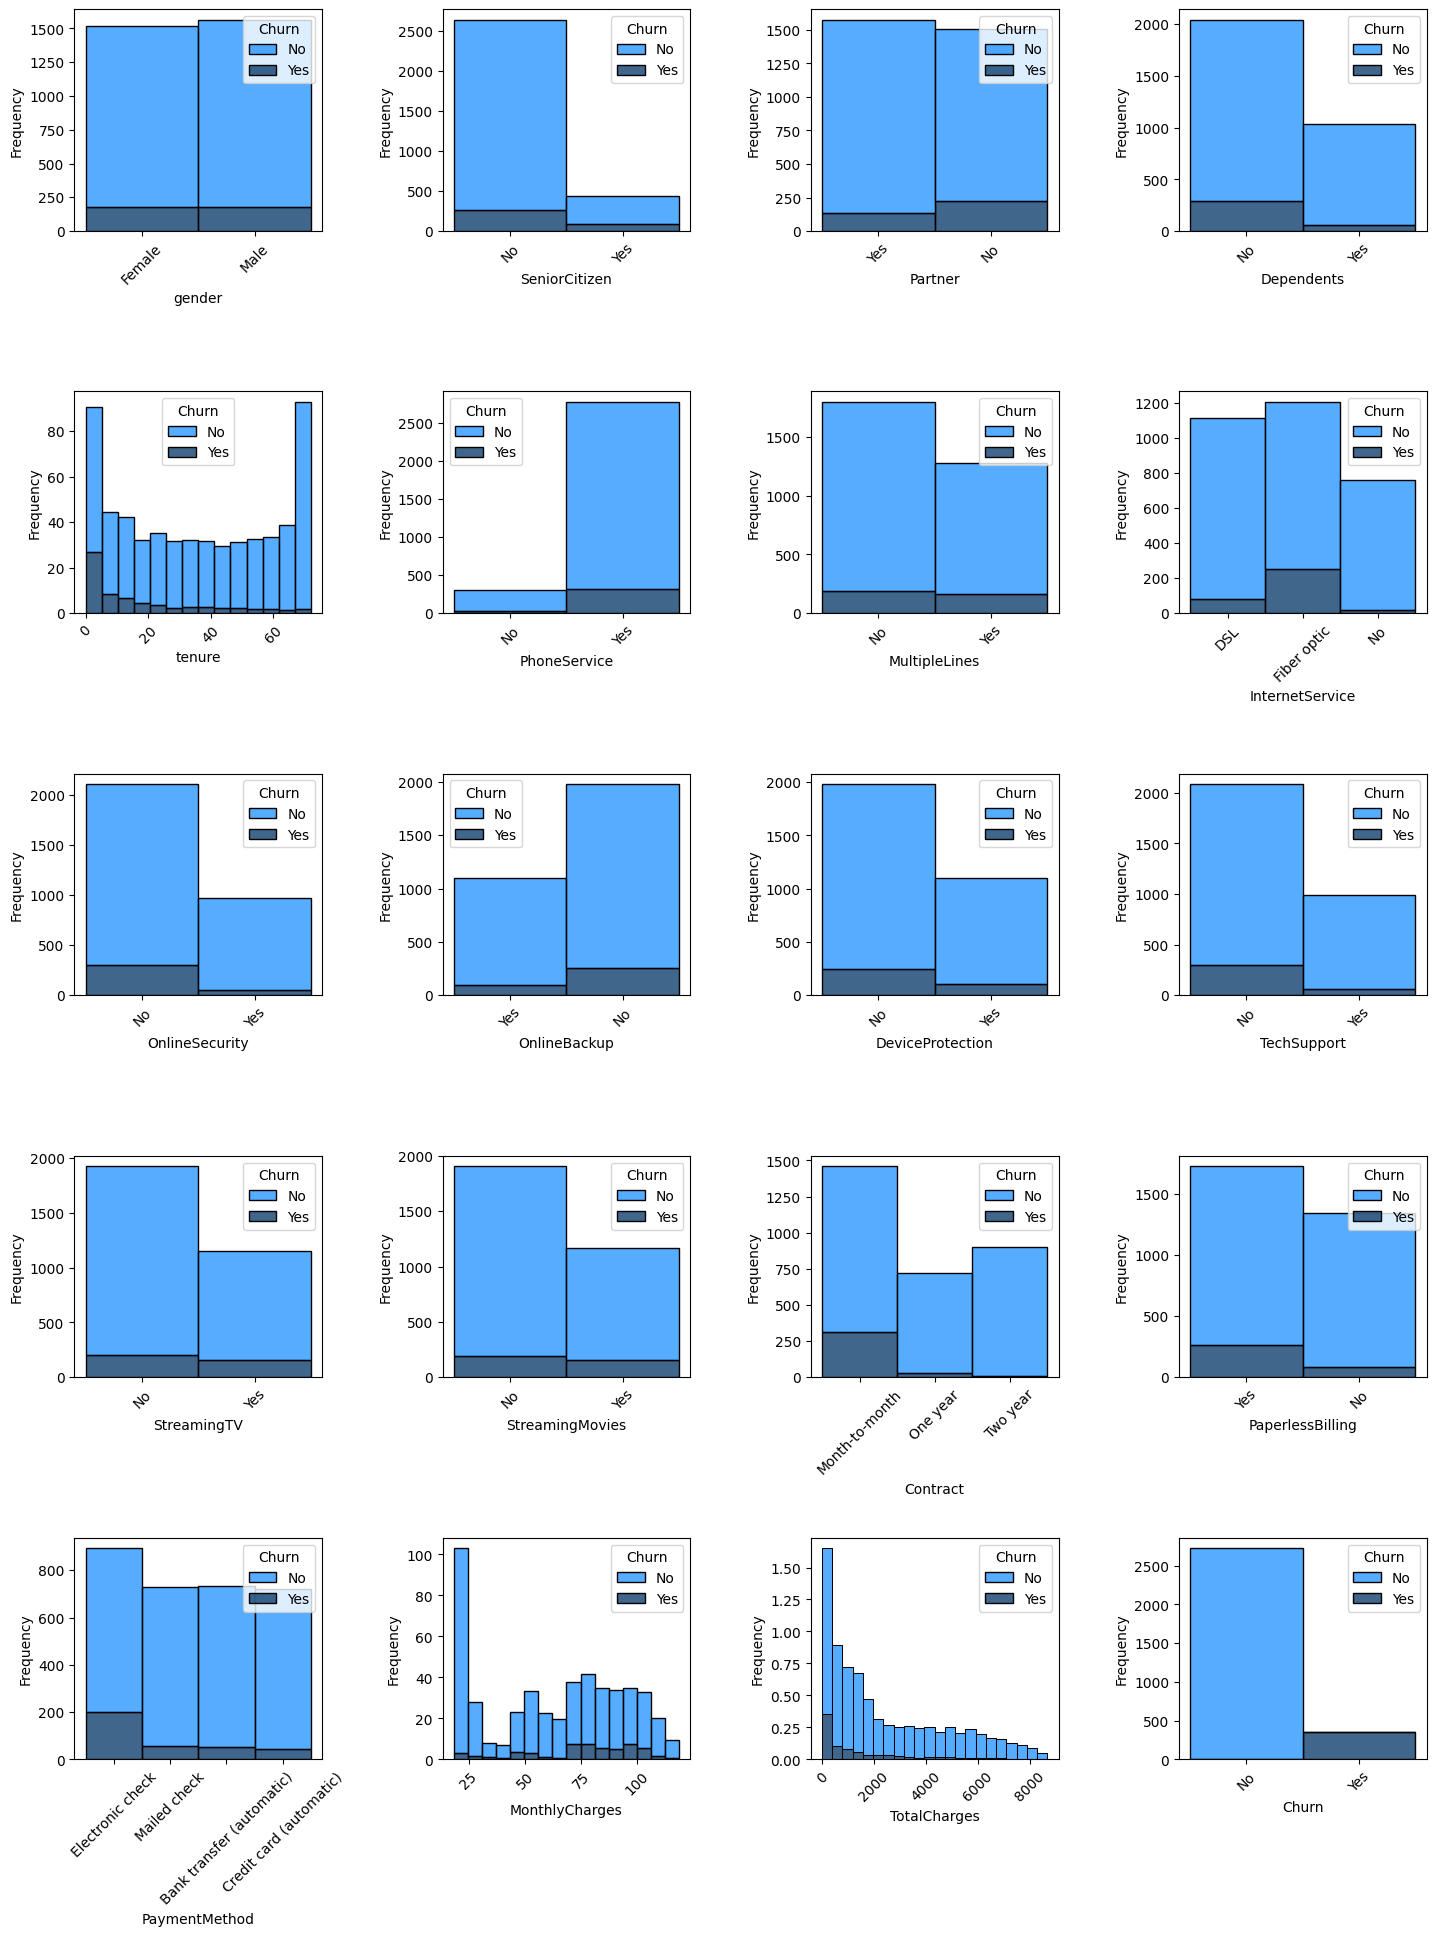

In [114]:
# plotting histogram visual
custom_palette = ['#1E90FF', '#003366']

plt.figure(figsize=(15, 20))

for i, variable in enumerate(col_no_id):
    plt.subplot(5,4, i + 1)
    sns.histplot(df_churn,x=df_churn[variable], stat='frequency', hue='Churn', multiple='stack', palette=custom_palette)
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)


#### Observations



## Answering Analytical Questions

### Question 1

#### What is the relationship between gender and Churn

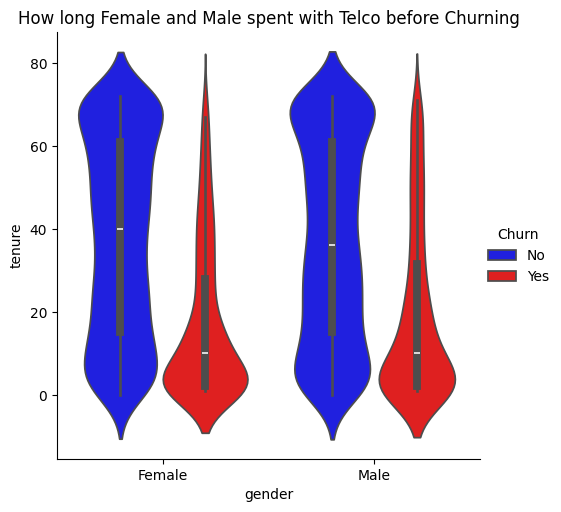

In [115]:
#plotting a violin plot visual
sns.catplot(df_churn, x='gender', y= 'tenure', hue='Churn', kind='violin', palette=['blue', 'red'] )
plt.title('How long Female and Male spent with Telco before Churning')
plt.show()

**Observations**
- The median tenure value for both Females and Males who did churn are almost the same
- Female and Males seems to have similar distribution in relation to those that churn or not
- The median tenure value for both gender who did not churn is higher than those that churn
- Both male and female customers exhibit higher churn rates within the first 10 months of tenure.

### Question 2

#### How long does it take each contract type before Churning

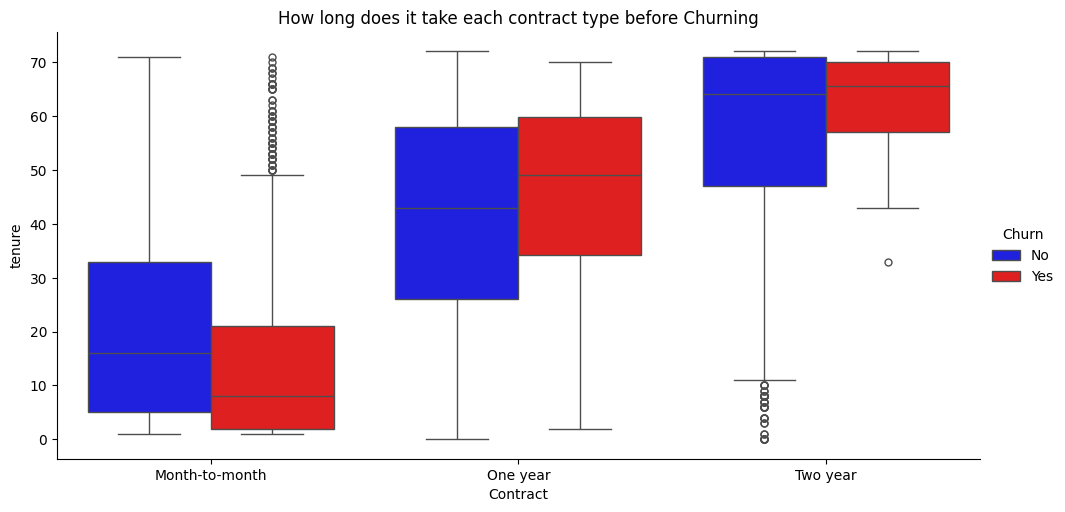

In [116]:
#plotting a box plot visual
sns.catplot(df_churn, x='Contract', y= 'tenure', hue='Churn', kind='box', aspect=2, palette=['blue', 'red'])
plt.title('How long does it take each contract type before Churning')
plt.show()

**Observations**

- We observed that customers with long term contracts tend to have longer tenure
- There outliers in the Month-to-Month and two year contract 
- The median tenure value for those on month-to-month contract that did not churn is higher than those that churned
- The median tenure value for thoes on one year and two years contract that did not churn is lower than those that did churned

### Question 3

#### Which method of payment was prefered among the Senior Citizens and how much in total did both senior and non Senior citizens paid before churning

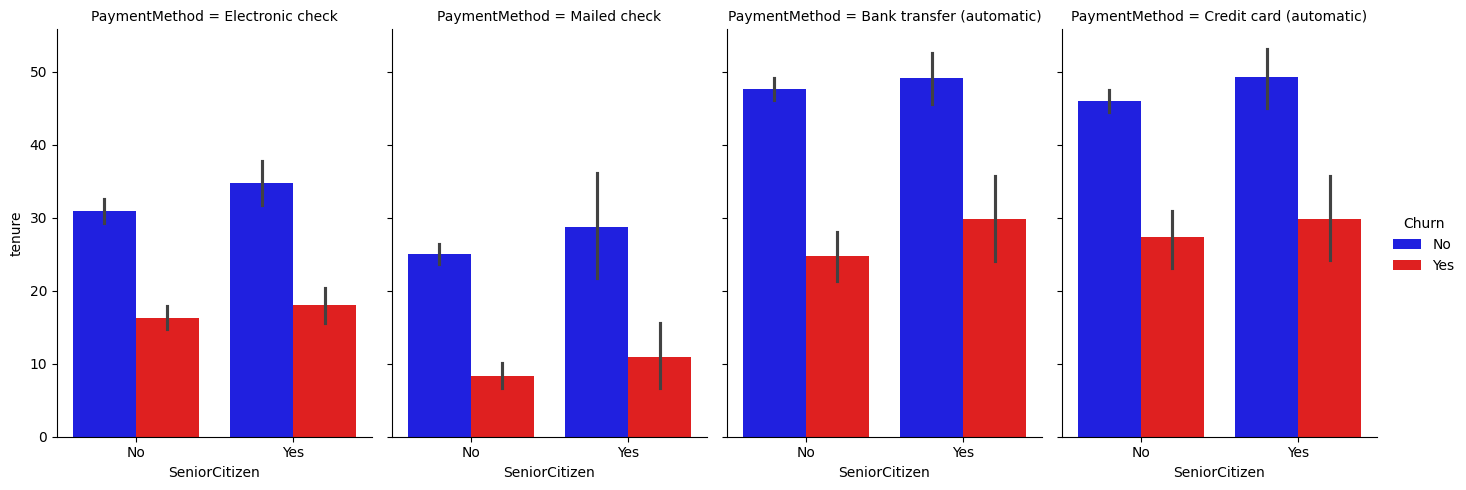

In [117]:
#plotting a bar chart visual
sns.catplot(
    data=df_churn, x='SeniorCitizen', y='tenure', hue='Churn',
    kind='bar', col='PaymentMethod', aspect=.7, palette=['blue', 'red']
)
plt.show()

**Observations**
- Across all the payment methods, the tenure for both senior citizens and non senior citizens that did not churn are higher than those that churned
- For both Senior Citizens and non senior citizens using Electronic check and Mailed check that churned have a lower tenure than those using bank transfer and credit cards

### Question 4

#### What is the churn trend for gender and dependents as well as their tenure

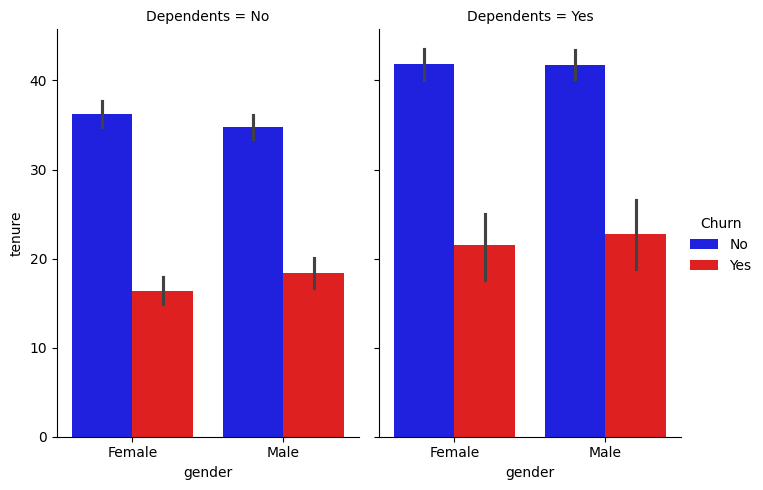

In [118]:
# #plotting a bar chart visual
sns.catplot(
    data=df_churn, x='gender', y='tenure', hue='Churn',
    kind='bar', col='Dependents', aspect=.7, palette=['blue', 'red']
)

**Observations**
- For both Females and Males the tenure for those that did not churn are higher than those that churned, whether they had dependents or not
- For both Females and Males that did not have dependents that churned have a lower tenure than those that had dependents

### Question 5

#### what is the trend between payment methods and gender and how it affect churning

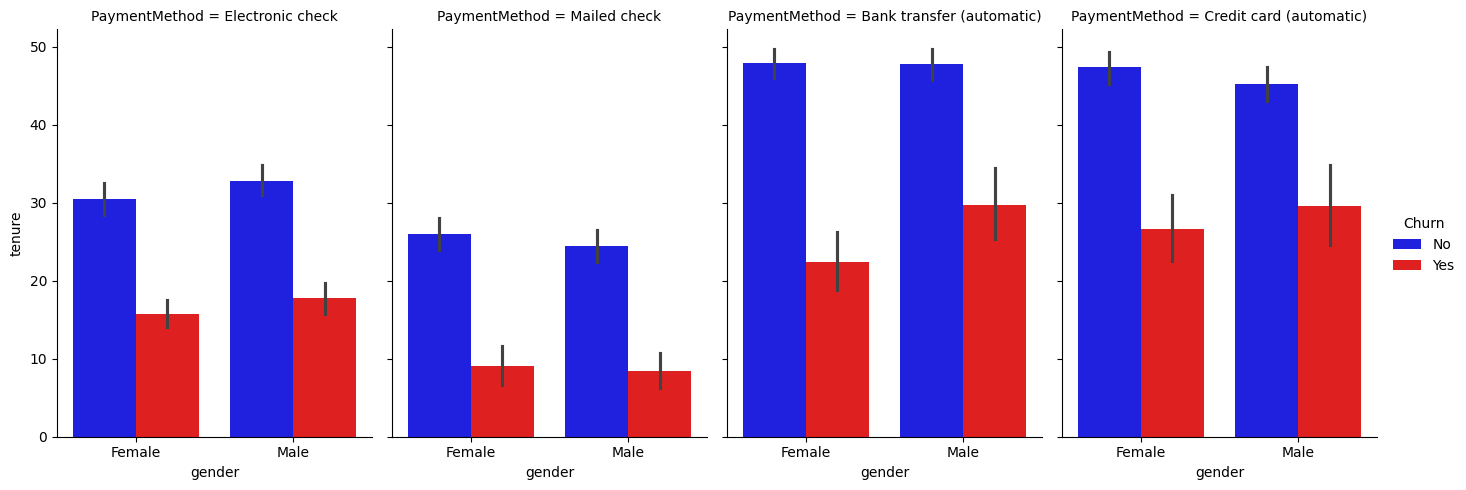

In [119]:
# plotting a bar chart visual
sns.catplot(
    data=df_churn, x='gender', y='tenure', hue='Churn',
    kind='bar', col='PaymentMethod', aspect=.7, palette=['blue', 'red']
)

**Observations**
- Across all the payment methods, the tenure for both Females and Males that did not churn are higher than those that churned
- For both Females and Males using Electronic check and Mailed check that churned have a lower tenure than those using bank transfer and credit cards

### Question 6

#### What is the trend between tenure, seniorcitizen and paperlessBilling in relation to churn

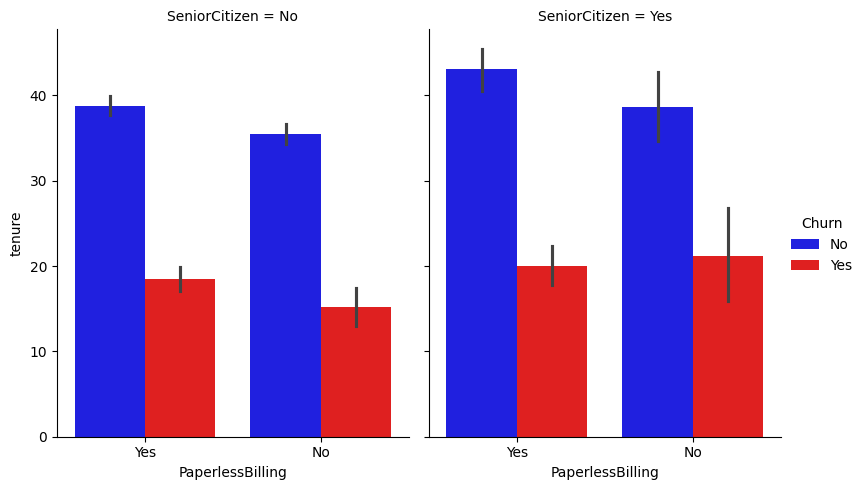

In [120]:
#plotting a bar chart visual
sns.catplot(
    data=df_churn, x='PaperlessBilling', y='tenure', hue='Churn',
    kind='bar', col='SeniorCitizen', aspect=0.8, palette=['blue', 'red']
)

### Question 7

#### What is the trend between tenure, Internet Service and senior citizen in relation to churn

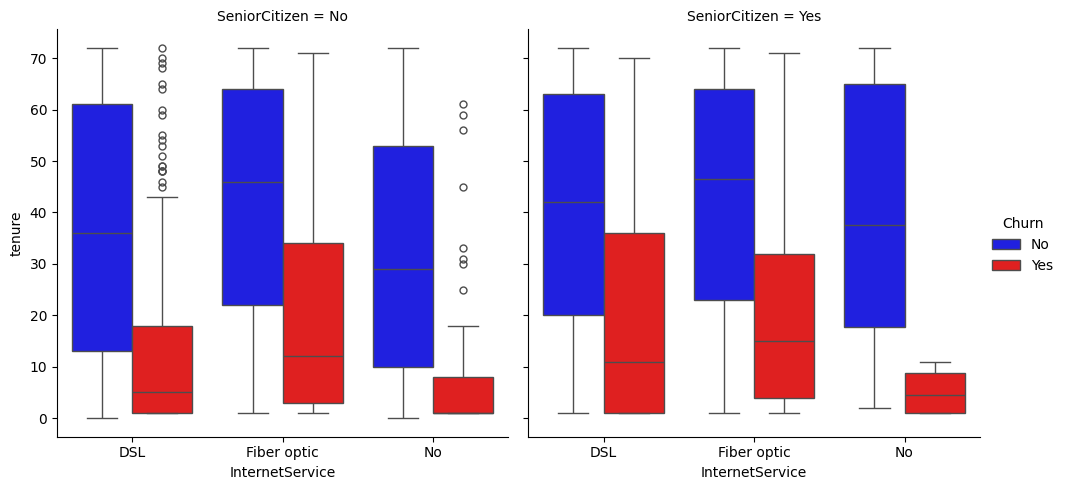

In [121]:
#plotting a box plot visual
sns.catplot(
    data=df_churn, x='InternetService', y='tenure', hue='Churn',
    kind='box', col='SeniorCitizen', aspect=1, palette=['blue', 'red']
)

### Question 8

#### What is the trend between StreamingMovies and senior citizen in relation to churn

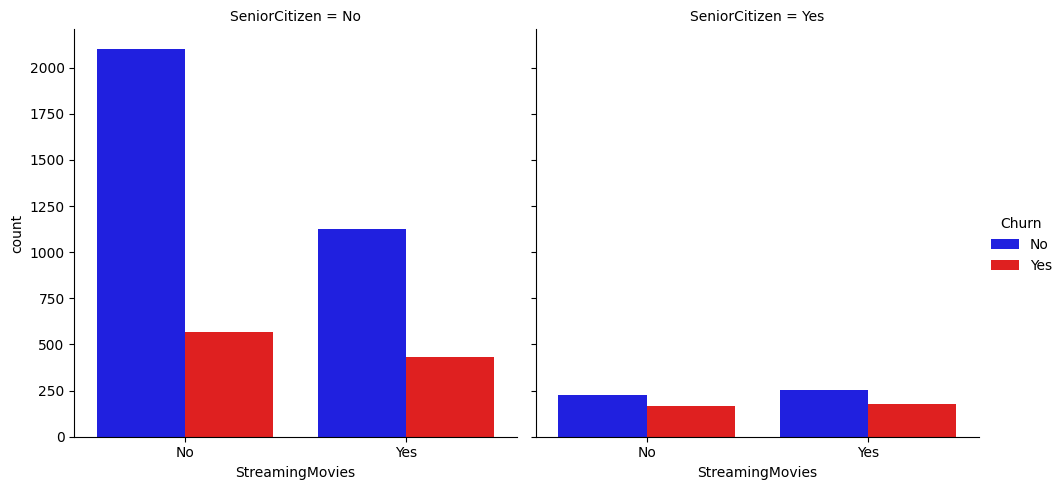

In [122]:
#plotting a count bar chart visual
sns.catplot(
    data=df_churn, x='StreamingMovies', hue='Churn',
    kind='count', col='SeniorCitizen', aspect=1, palette=['blue', 'red']
)
plt.show()

### Question 9

#### How does internetService and OnlineSecurity affect churn

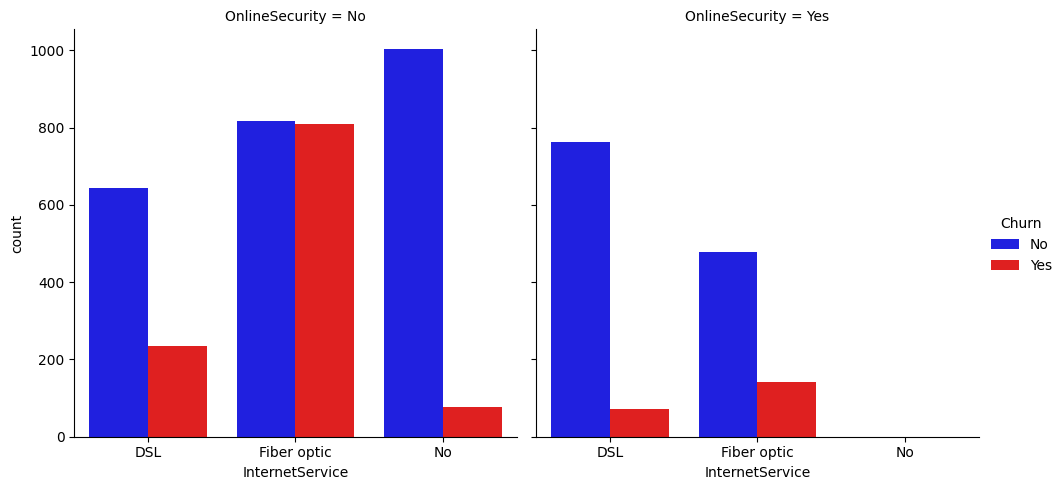

In [123]:
#plotting a count bar chart visual
sns.catplot(
    data=df_churn, x='InternetService', hue='Churn',
    kind='count', col='OnlineSecurity', aspect=1, palette=['blue', 'red']
)

### Question 10

#### What is the trend between Contract, Payment Method and gender in relation to churn

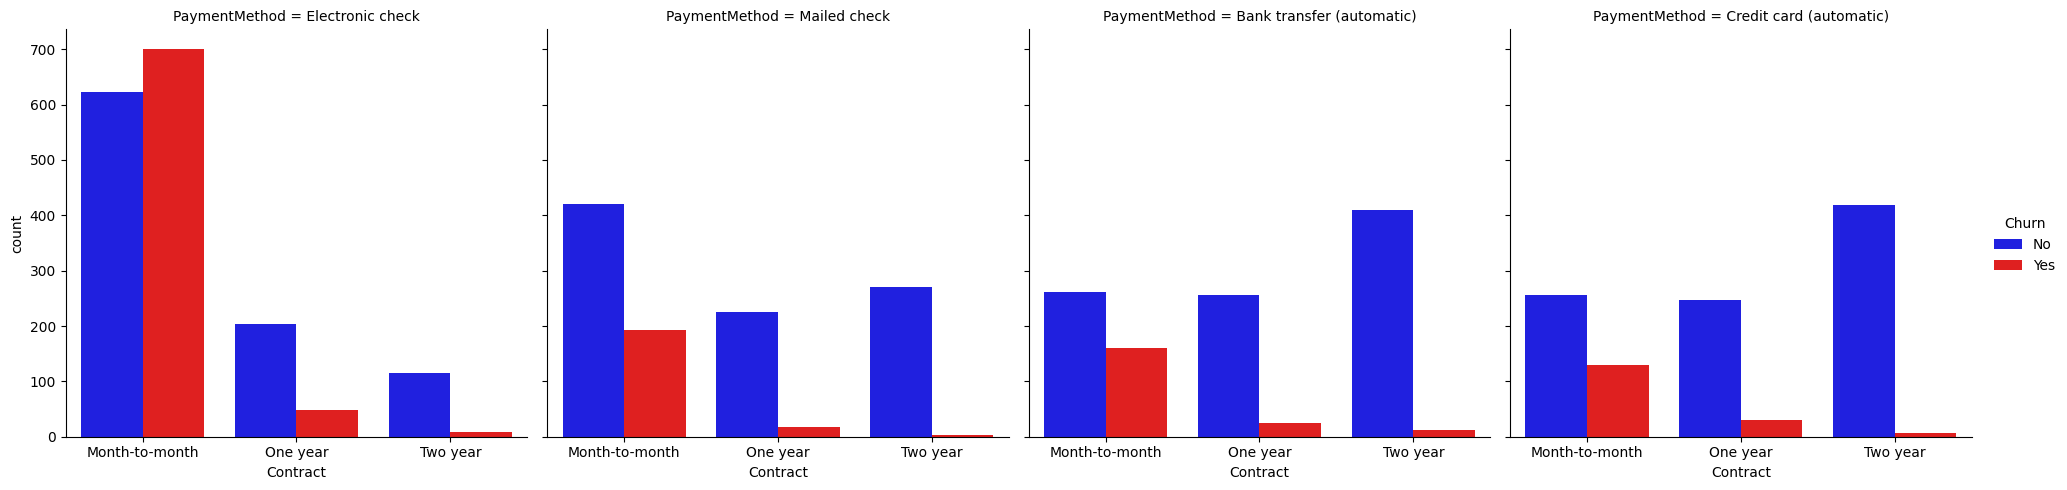

In [124]:
#plotting a count bar chart visual
sns.catplot(
    data=df_churn, x='Contract', hue='Churn',
    kind='count', col='PaymentMethod', aspect=1, col_wrap=4, palette=['blue', 'red']
)

plt.show()

### HYPOTHESIS

- A significance level (α) of 5% will used to perform all the hypothesis testing


 ### 1

Let  μ1,μ2 be the mean amount of TotalCharges for customers that churned and those that did not churned respectively

The null hypothesis : The average amount of TotalCharges for customers that churn is greater than or equal to those that did not churn

Ho:μ1>=μ2
 
The alternate hypothesis : The average amount of TotalCharges for customers that churn is less than to those that did not churn

Ha:μ1<μ2

HYPOTHESIS TEST: MANNWHITNEYU TEST

In [125]:
#Total charges for customers that churned
totcharge_churn = df_churn[df_churn['Churn']=='Yes']['TotalCharges']

#Total charges for customers that did not churned
totcharge_no_churn = df_churn[df_churn['Churn']=='No']['TotalCharges']
# Perform the Mann-Whitney U test
test_stat, p_value = stats.mannwhitneyu(totcharge_churn,totcharge_no_churn)


In [126]:
# Print the results
print("Mann-Whitney test_statistic:", test_stat)
print("P-value:", p_value)

Mann-Whitney test_statistic: 1745947.0
P-value: 1.143960917273913e-57


In [127]:
# our significance level
α = 0.05
# Comparing the p-value with α
if p_value < α:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 1.143960917273913e-57 is less than the level of significance, we reject the null hypothesis.


**Remarks**

- Since the pvalue (~0.0000) is less than the level of significance(α=0.05), we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average amount of TotalCharges for customers that churn is less than to those that did not churn

### 2

Let  μ1,μ2 be the mean number of Month-to-Month and One-year contract customers respectively

The null hypothesis : The average number of churn for customers that have Month_to_Month contract is greater than or equal to those with 'One year' contract

Ho:μ1>=μ2
 
The alternate hypothesis : The average number of churn for customers that have Month_to_Month contract is less than to those with 'One year' contract 

Ha:μ1<μ2


HYPOTHESIS TEST: MANNWHITNEYU TEST


In [128]:
#printing means and standard deviations of number of Month-to-Month and One-year Contract customers

print('The mean number of Month-to-Month contract customers that churned is ' + str(round(df_churn[(df_churn['Contract']=='Month-to-month')& (df_churn['Churn']=='Yes')].count().mean(), 2)))
print('The mean number of One year contract customer that churned is ' + str(round(df_churn[(df_churn['Contract']=='One year')& (df_churn['Churn']=='Yes')].count().mean(), 2)))
print('The standard deviation of Month-to-Month contract customers that churned is ' + str(round(df_churn[(df_churn['Contract']=='Month-to-month')& (df_churn['Churn']=='Yes')].count().std(), 2)))
print('The standard deviation of One year contract customer that churned is ' + str(round(df_churn[(df_churn['Contract']=='One year')& (df_churn['Churn']=='Yes')].count().std(), 2)))

The mean number of Month-to-Month contract customers that churned is 1184.0
The mean number of One year contract customer that churned is 122.0
The standard deviation of Month-to-Month contract customers that churned is 0.0
The standard deviation of One year contract customer that churned is 0.0


In [129]:
#Mont-to-month contract customers that churned
month_con_churned = df_churn[(df_churn['Contract']=='Month-to-month')& (df_churn['Churn']=='Yes')].count()

#One year contract customers that churned
one_yr_con_churned = df_churn[(df_churn['Contract']=='One year')& (df_churn['Churn']=='Yes')].count()
# Calculating the p-value

test_stat, p_value=stats.mannwhitneyu(month_con_churned, one_yr_con_churned)
print(f'The p-value is:  {p_value}\nThe Test statistics is: {test_stat}')


The p-value is:  1.674062078452337e-10
The Test statistics is: 441.0


In [130]:
# our significance level
α = 0.05
# Comparing the p-value with α
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 1.674062078452337e-10 is less than the level of significance, we reject the null hypothesis.


**Remarks**

- Since the pvalue (~0.0) is less than the level of significance(α=0.05), we reject the null hypothesis. Hence, we have enough statistical evidence to say that theaverage number of churn for customers that have Month_to_Month contract is less than to those with 'One year' contract 

### 3

The null hypothesis :  Gender does not influence customer churn
 
The alternate hypothesis :   Gender influences customer churn

HYPOTHESIS TEST: CHI-SQUARE TEST OF INDEPENDENCE

In [131]:
# cross tabulate the pair
contingency_tables = pd.crosstab(df_churn['gender'], df_churn['Churn'])
# Perform the chi-square test
chi2, p, dof, expected  = chi2_contingency(contingency_tables)
# Print the results
print(f"Chi-squared:", {chi2})
print(f"p-value:", {p})
print(f"Degrees of freedom:", {dof})
print(f"Expected frequencies:", expected)
# our significance level
α = 0.05
# Comparing the p-value with α
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Chi-squared: {0.024146708104267937}
p-value: {0.8765122032778316}
Degrees of freedom: {1}
Expected frequencies: [[1825.93456276  658.06543724]
 [1881.06543724  677.93456276]]
As the p-value 1.674062078452337e-10 is less than the level of significance, we reject the null hypothesis.


**Remarks**

- Since the pvalue (~0.8765) is greater than the level of significance(α=0.05), we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that Gender influences customer churn

### 4

The null hypothesis :  The Internet service does not influence customer churn
 
The alternate hypothesis :   The Internet service influences customer churn

HYPOTHESIS TEST: CHI-SQUARE TEST OF INDEPENDENCE

In [132]:
# cross tabulate the pair
contingency_table = pd.crosstab(df_churn['InternetService'], df_churn['Churn'])

# Perform the chi-square test
chi2, p, dof, expected  = chi2_contingency(contingency_table)
# Print the results
print(f"Chi-squared:", {chi2})
print(f"p-value:", {p})
print(f"Degrees of freedom:", {dof})
print(f"Expected frequencies:", expected)
# our significance level
α = 0.05
# Comparing the p-value with α
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Chi-squared: {561.7822685229834}
p-value: {1.0245434346853363e-122}
Degrees of freedom: {2}
Expected frequencies: [[1260.65932976  454.34067024]
 [1652.45607773  595.54392227]
 [ 793.8845925   286.1154075 ]]
As the p-value 1.674062078452337e-10 is less than the level of significance, we reject the null hypothesis.


**Remarks**

- Since the pvalue (~0.0) is less than the level of significance(α=0.05), we reject the null hypothesis. Hence, we have enough statistical evidence to say that the Internet service influences customer churn


### 5

Let  μ1,μ2 be the mean number of tenure for customers that churnd and those that did not churn respectively

The null hypothesis : The average number of tenure for customers that churn is less than or equal to those that did not churn

Ho:μ1<=μ2
 
The alternate hypothesis :The average number of tenure for customers that churn is greater than those that did not churn 

Ha:μ1>μ2

HYPOTHESIS TEST: MANNWHITNEYU TEST

In [133]:
#Tenure for customers that churned
tenure_churn = df_churn[df_churn['Churn']=='Yes']['tenure']

#Tenure for customers that did not churned
tenure_no_churn = df_churn[df_churn['Churn']=='No']['tenure']
# Perform the Mann-Whitney U test
test_stat, p_value = stats.mannwhitneyu(tenure_churn,tenure_no_churn)
# Print the results
print("Mann-Whitney test_statistic:", test_stat)
print("P-value:", p_value)

Mann-Whitney test_statistic: 1292899.5
P-value: 1.859353811918033e-148


In [134]:
# our significance level
α = 0.05
# Comparing the p-value with α
if p_value < α:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 1.859353811918033e-148 is less than the level of significance, we reject the null hypothesis.


**Remarks**

- Since the pvalue (~0.0) is less than the level of significance(α=0.05), we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average number of tenure for customers that churn is greater than those that did not churn 

### 6
Null Hypothesis (H0): There is no significant difference in the mean TotalCharges across different levels of the categorical variable PaymentMethod.

Alternative Hypothesis (H1): At least one pair of means of TotalCharges across different levels of PaymentMethod is significantly different.

In [135]:
#  Using anova test for the test
pg.anova(data=df_churn, dv='TotalCharges', between='PaymentMethod')

pg.pairwise_tests(data=df_churn, dv='TotalCharges', between='PaymentMethod', padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,PaymentMethod,Bank transfer (automatic),Credit card (automatic),False,True,0.365191,2203.738351,two-sided,7.150042e-01,1.000000e+00,bonf,0.051,0.015524
1,PaymentMethod,Bank transfer (automatic),Electronic check,False,True,12.151605,2275.474157,two-sided,5.770009e-33,3.462006e-32,bonf,5.56e+29,0.474318
2,PaymentMethod,Bank transfer (automatic),Mailed check,False,True,24.775653,1896.781608,two-sided,1.228542e-117,7.371252e-117,bonf,1.243e+116,1.044188
3,PaymentMethod,Credit card (automatic),Electronic check,False,True,11.360786,2134.318088,two-sided,4.405790e-29,2.643474e-28,bonf,8.052e+25,0.451479
4,PaymentMethod,Credit card (automatic),Mailed check,False,True,23.477611,1791.026520,two-sided,1.728380e-106,1.037028e-105,bonf,1.392e+105,1.004657
5,PaymentMethod,Electronic check,Mailed check,False,True,14.338772,2823.806016,two-sided,4.607880e-45,2.764728e-44,bonf,3.49e+41,0.511297


### Remarks

If the p-value obtained from the ANOVA test is less than a chosen significance level (typically 0.05), then we reject the null hypothesis, indicating that there is sufficient evidence to suggest that there is a significant difference in at least one pair of means.

### 7

The null hypothesis :  The Payment Method does not influence customer churn
 
The alternate hypothesis :   The Payment Method  influences customer churn

HYPOTHESIS TEST: CHI-SQUARE TEST OF INDEPENDENCE

In [136]:
# cross tabulate the pair
contingency_table_pay = pd.crosstab(df_churn['PaymentMethod'], df_churn['Churn'])

# Perform the chi-square test
chi2, p, dof, expected  = chi2_contingency(contingency_table_pay)
# Print the results
print(f"Chi-squared:", {chi2})
print(f"p-value:", {p})
print(f"Degrees of freedom:", {dof})
print(f"Expected frequencies:", expected)
# our significance level
α = 0.05
# Comparing the p-value with α
if p < 0.05:
    print(f'As the p-value {p} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p} is greater than the level of significance, we fail to reject the null hypothesis.')

Chi-squared: {434.57845299430187}
p-value: {7.15250271664344e-94}
Degrees of freedom: {3}
Expected frequencies: [[ 826.96311719  298.03688281]
 [ 801.23537577  288.76462423]
 [1249.63315487  450.36684513]
 [ 829.16835217  298.83164783]]
As the p-value 7.15250271664344e-94 is less than the level of significance, we reject the null hypothesis.


**Remarks**

- Since the pvalue (~0.0) is less than the level of significance(α=0.05), we reject the null hypothesis. Hence, we have enough statistical evidence to say that PaymentMethod influences customer churn

### Data Preparation


In [137]:
df_churn_mod=pd.concat([telco_churn_sql, telco_churn_git])

In [138]:
df_churn_mod = df_churn_mod.drop(columns='Unnamed: 0')

In [139]:
df_churn_mod['Churn'].unique()

array([False, True, nan, 'No', 'Yes'], dtype=object)

In [140]:
#Replacing the ' ' with nothing
df_churn_mod['TotalCharges']=df_churn_mod['TotalCharges'].str.replace(' ','')

In [141]:
df_churn_mod['TotalCharges']=pd.to_numeric(df_churn_mod['TotalCharges'])

In [142]:
# assigning columns with bool type to columns_to_convert
bool_col_to_str = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Convert columns with bool type to object (str)
df_churn_mod[bool_col_to_str] = df_churn_mod[bool_col_to_str].astype(str)

#Selecting only object types to apply function on
objct_columns = df_churn_mod.select_dtypes(include=['object'])

#droping columns we will not want to apply function to
objct_columns = objct_columns.drop(['customerID', 'gender', 'InternetService', 'Contract', 'PaymentMethod'], axis=1)

replace_yes=['True', '1']
replace_no= ['False', '0']

#Function to replace True with Yes and False with No
for column in objct_columns:
    df_churn_mod[column]=df_churn_mod[column].astype(str).apply(lambda x : 'Yes' if x in replace_yes else 'No' if x in replace_no else x)    


In [143]:
objt_columns = df_churn_mod.select_dtypes(include=['object'])
objt_columns = objt_columns.drop('customerID', axis=1)

for column in objt_columns:
    unique_values=df_churn_mod[column].unique()
    print(f'\n{column}\n{unique_values}\n')


gender
['Female' 'Male']


SeniorCitizen
['No' 'Yes']


Partner
['Yes' 'No']


Dependents
['No' 'Yes']


PhoneService
['No' 'Yes']


MultipleLines
['nan' 'No' 'Yes' 'No phone service']


InternetService
['DSL' 'Fiber optic' 'No']


OnlineSecurity
['No' 'Yes' 'nan' 'No internet service']


OnlineBackup
['Yes' 'No' 'nan' 'No internet service']


DeviceProtection
['No' 'Yes' 'nan' 'No internet service']


TechSupport
['No' 'Yes' 'nan' 'No internet service']


StreamingTV
['No' 'Yes' 'nan' 'No internet service']


StreamingMovies
['No' 'Yes' 'nan' 'No internet service']


Contract
['Month-to-month' 'One year' 'Two year']


PaperlessBilling
['Yes' 'No']


PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Churn
['No' 'Yes' 'nan']



In [144]:
# dropping customer id column
df_churn_mod=df_churn_mod.drop(columns=['customerID'])

In [145]:
# retrieving the first 5 rows
df_churn_mod.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,nan,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,NaN,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,NaN,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,NaN,Yes
3,Male,No,No,No,45,No,nan,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,NaN,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,NaN,Yes


In [146]:
# retrieving the row with 'nan' string
df_churn_mod[df_churn_mod['Churn'] == 'nan']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2988,Male,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Electronic check,109.650002,NaN,nan


In [147]:
#Replacing 'nan' string to a null value
df_churn_mod['Churn'] = df_churn_mod['Churn'].replace('nan', np.nan)

In [148]:
# filling null value with 'No'
df_churn_mod['Churn'] = df_churn_mod['Churn'].fillna('No')

#### Checking if data is ballanced

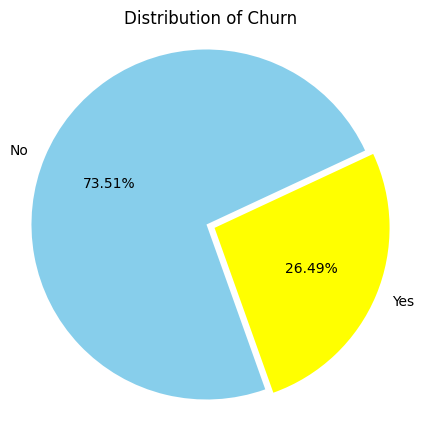

In [149]:
df_churn_mod['Churn']=df_churn_mod['Churn'].fillna('No')
df_churn_mod['Churn'].unique()

churn_counts = df_churn_mod['Churn'].value_counts()
explode = [0.05 if label == 'Yes' else 0 for label in churn_counts.index]

plt.figure(figsize=(5, 5))  
plt.pie(churn_counts, labels=churn_counts.index, explode=explode, autopct='%1.2f%%', startangle=25, colors=['skyblue', 'yellow'])
plt.axis('equal')
plt.title('Distribution of Churn')
plt.show()

- There is imbalance in the class labels, 73.5% against 26.5%
- We will use SMOTE to treat imbalance.
- We will model the imbalance and balanced and compare  

#### Splitting data into x and y, (training and evaluation)

In [150]:
X = df_churn_mod.drop(columns=['Churn']) 

y = df_churn_mod['Churn']  

In [151]:
# Splitting the data into training and evaluation sets for both features and labels
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.25, random_state=5, stratify = y)


In [152]:
print(f'X_train shape: {X_train.shape}\nX_eval shape: {X_eval.shape}\ny_train shape: {y_train.shape}\ny_eval shape: {y_eval.shape}')

X_train shape: (3782, 19)
X_eval shape: (1261, 19)
y_train shape: (3782,)
y_eval shape: (1261,)


#### Pipelines

In [153]:
#Encoding dependent variables
encoder=LabelEncoder()

y_train_encode=encoder.fit_transform(y_train)
y_eval_encode=encoder.transform(y_eval)


#selecting numeric and categorical columns
numeric_cols=X_train.select_dtypes(include='number').columns
cat_cols = X_train.select_dtypes(include='object').columns


#numerical pipeline
num_pipeline=Pipeline(steps=[
    ('num_imputer', CustomImputer(strategy='constant', custom_value=0)),
    ('num_scaler', RobustScaler()),
])

#catigorical pipeline
cat_pipeline=Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])

preprocessor= ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, numeric_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
])

#### Train and evaluate on balanced labels

In [154]:

models={}
models['Logistic_Regression']= LogisticRegression(random_state=5)
models['Support_Vector_Machine']= LinearSVC(random_state=5)
models['Decision_Tree']= DecisionTreeClassifier(random_state=5)
models['Random_Forest']= RandomForestClassifier(random_state=5)
models['Naive_Bayes']= GaussianNB()
models['K-Nearest_Neighbors']= KNeighborsClassifier()
models['Category_Boosting']= CatBoostClassifier(random_state=5, verbose=0)
models['Gradient_Boosting']= GradientBoostingClassifier(random_state=5)
models['XGBoost']= XGBClassifier(random_state=5)

# Define feature selection step
feature_selection = SelectKBest(score_func= mutual_info_classif, k='all')

In [155]:
# Creating Pipeline

all_pipelines_balanced = {}
metric_table_balanced = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in models.items(): 
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)),
        ('feature_selection', feature_selection), 
        ('classifier', classifier)  
    ])
        
    balanced_pipeline.fit(X_train, y_train_encode)
    all_pipelines_balanced[model_name] = balanced_pipeline
    
    y_pred=balanced_pipeline.predict(X_eval)
    
    metrics= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table_balanced.loc[len(metric_table_balanced)]=[model_name, accuracy, precision, recall, f1_score]

metric_table_balanced.sort_values(by='f1-score', ascending=False)

,model_name,accuracy,precision,recall,f1-score
7,Gradient_Boosting,0.808882,0.813005,0.808882,0.810700
6,Category_Boosting,0.799366,0.794627,0.799366,0.796580
3,Random_Forest,0.794607,0.789079,0.794607,0.791299
0,Logistic_Regression,0.773196,0.813494,0.773196,0.783670
8,XGBoost,0.785884,0.778561,0.785884,0.781326
1,Support_Vector_Machine,0.766852,0.811850,0.766852,0.778131
2,Decision_Tree,0.733545,0.741448,0.733545,0.737080
5,K-Nearest_Neighbors,0.694687,0.771707,0.694687,0.712065
4,Naive_Bayes,0.688343,0.810863,0.688343,0.706323


#### Train and evaluate on non balanced labels

In [156]:
# Creating Pipeline

all_pipelines = {}

# creating a dataframe 
metric_table=pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

# function to retrieve items in models
for model_name, classifier in models.items(): 
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', feature_selection),   
        ('classifier', classifier)  
    ])
     # Fitting the models   
    final_pipeline.fit(X_train, y_train_encode)
    all_pipelines[model_name] = final_pipeline
    
    # Predicting the model
    y_predr=final_pipeline.predict(X_eval)
    
    #  Classification report
    metrics= classification_report(y_eval_encode, y_predr, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table.loc[len(metric_table)]=[model_name, accuracy, precision, recall, f1_score]
# Sort values in ascending order
metric_table.sort_values(by='f1-score', ascending=False)



,model_name,accuracy,precision,recall,f1-score
0,Logistic_Regression,0.827121,0.819868,0.827121,0.820847
1,Support_Vector_Machine,0.823949,0.816306,0.823949,0.817324
7,Gradient_Boosting,0.801745,0.790505,0.801745,0.791491
6,Category_Boosting,0.800952,0.789807,0.800952,0.791096
3,Random_Forest,0.798573,0.787364,0.798573,0.789036
8,XGBoost,0.790642,0.781524,0.790642,0.784399
5,K-Nearest_Neighbors,0.758128,0.755628,0.758128,0.756817
2,Decision_Tree,0.728787,0.731408,0.728787,0.730051
4,Naive_Bayes,0.661380,0.806983,0.661380,0.679840


### Hyperparameter Tuning

**Hyperparameter tuning models with Balanced labels**

In [157]:

# Define preprocessor pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeliner', num_pipeline, numeric_cols),
    ('cat_pipeliner', cat_pipeline, cat_cols)
])

# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)),
        (model_name.lower().replace(' ', '_'), model)
    ])

# Define parameter grids for each model
pparam_grids = {
    'Logistic_Regression': {'logistic_regression__C': [10, 100, 200, 300]},
    'Support_Vector_Machine': {'support_vector_machine__C': [1]},
    'Decision_Tree': {'decision_tree__max_depth': [2, 5, 10]},
    'Random_Forest': {'random_forest__n_estimators': [200, 300, 400], 'random_forest__max_depth': [10, 20, 30]},
    'Category_Boosting': {'category_boosting__learning_rate': [0.1, 1, 10], 'category_boosting__depth': [5], 'category_boosting__iterations': [100, 200, 300]},
    'Gradient_Boosting': {'gradient_boosting__n_estimators': [100], 'gradient_boosting__max_depth': [2, 3], 'gradient_boosting__learning_rate': [0.1, 1, 10]},
    'XGBoost': {'xgboost__n_estimators': [30, 40, 50], 'xgboost__max_depth': [2, 3]}

}

# Perform grid search for each model
for model_name, pipeline in pipelines.items():
    if model_name in ['Logistic_Regression', 'Support_Vector_Machine', 'Decision_Tree', 'Random_Forest', 'Category_Boosting', 'Gradient_Boosting', 'XGBoost']:
        print(f"Tuning {model_name}...")
        grid_search = GridSearchCV(pipeline, pparam_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train_encode)  
    
    # Print best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

Tuning Logistic_Regression...
Best parameters: {'logistic_regression__C': 10}
Best score: 0.7554178636080882
Tuning Support_Vector_Machine...


/Users/mac/Documents/Project/Telcommunication Churn/Telco-Customer-Churn-Prediction/venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/mac/Documents/Project/Telcommunication Churn/Telco-Customer-Churn-Prediction/venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/mac/Documents/Project/Telcommunication Churn/Telco-Customer-Churn-Prediction/venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/mac/Documents/Project/Telcommunication Churn/Telco-Customer-Churn-

Best parameters: {'support_vector_machine__C': 1}
Best score: 0.7522439593773806
Tuning Decision_Tree...
Best parameters: {'decision_tree__max_depth': 5}
Best score: 0.7641441781468201
Tuning Random_Forest...
Best parameters: {'random_forest__max_depth': 20, 'random_forest__n_estimators': 400}
Best score: 0.7863594109300847
Best parameters: {'random_forest__max_depth': 20, 'random_forest__n_estimators': 400}
Best score: 0.7863594109300847
Best parameters: {'random_forest__max_depth': 20, 'random_forest__n_estimators': 400}
Best score: 0.7863594109300847
Tuning Category_Boosting...


learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease l

Best parameters: {'category_boosting__depth': 5, 'category_boosting__iterations': 100, 'category_boosting__learning_rate': 0.1}
Best score: 0.7884775604062261
Tuning Gradient_Boosting...
Best parameters: {'gradient_boosting__learning_rate': 0.1, 'gradient_boosting__max_depth': 3, 'gradient_boosting__n_estimators': 100}
Best score: 0.7845107043257638
Tuning XGBoost...
Best parameters: {'xgboost__max_depth': 2, 'xgboost__n_estimators': 40}
Best score: 0.785037708023177


 **Tuned Models for balanced labels**

In [158]:
tuned_models_b={}
tuned_models_b['Logistic_Regression_tunedb']= LogisticRegression(
                            C=10,  
                            random_state=5)
tuned_models_b['Support_Vector_Machine_tunedb']= LinearSVC(
                            C= 1, 
                            random_state=5)
tuned_models_b['Decision_Tree_tunedb']= DecisionTreeClassifier(
                            max_depth= 5,  
                            random_state=5)
tuned_models_b['Random_Forest_tunedb']= RandomForestClassifier( 
                            max_depth= 20,  
                            n_estimators= 200, 
                            random_state=5)
tuned_models_b['Naive_Bayes']= GaussianNB()
tuned_models_b['K-Nearest_Neighbors']= KNeighborsClassifier()
tuned_models_b['Category_Boosting_tunedb']= CatBoostClassifier(
                            depth= 5,
                            iterations= 200, 
                            learning_rate= 0.1, 
                            random_state=5, 
                            verbose=0)
tuned_models_b['Gradient_Boosting_tunedb']= GradientBoostingClassifier( 
                            max_depth= 3,
                            learning_rate= 0.1,  
                            n_estimators= 100, 
                            random_state=5)
tuned_models_b['XGBoost_tunedb']= XGBClassifier( 
                            max_depth= 3,  
                            n_estimators= 50, 
                            random_state=5)

#### Training Tuned Models on balanced labels

In [159]:
# Creating Pipeline

all_pipelines_b = {}

# Creating confusion matrix
all_confusion_matrices_b = {}

# Create a dataframe
metric_table=pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

# function to retrieve items in models
for model_name, classifier in tuned_models_b.items(): 
    final_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)),
        ('feature_selection', feature_selection), 
        ('classifier', classifier)  
    ])
    # Fitting the models
    final_pipeline.fit(X_train, y_train_encode)
    all_pipelines_b[model_name] = final_pipeline
    # Predicting the model
    y_pred=final_pipeline.predict(X_eval)
    # Confusion matrix
    conf_matrix_b = confusion_matrix(y_eval_encode, y_pred)
    
    all_confusion_matrices_b[model_name]=conf_matrix_b
    # Classification report
    metrics= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table.loc[len(metric_table)]=[model_name, accuracy, precision, recall, f1_score]
# sorting values in ascending order
metric_table.sort_values(by='f1-score', ascending=False)

,model_name,accuracy,precision,recall,f1-score
8,XGBoost_tunedb,0.811261,0.811994,0.811261,0.811619
7,Gradient_Boosting_tunedb,0.808882,0.813005,0.808882,0.810700
6,Category_Boosting_tunedb,0.806503,0.802741,0.806503,0.804343
3,Random_Forest_tunedb,0.801745,0.797233,0.801745,0.799101
2,Decision_Tree_tunedb,0.785091,0.790100,0.785091,0.787318
0,Logistic_Regression_tunedb,0.770817,0.810901,0.770817,0.781357
1,Support_Vector_Machine_tunedb,0.766852,0.811850,0.766852,0.778131
5,K-Nearest_Neighbors,0.694687,0.771707,0.694687,0.712065
4,Naive_Bayes,0.688343,0.810863,0.688343,0.706323


**Plotting confusion metrix of tuned models for balanced labels** 

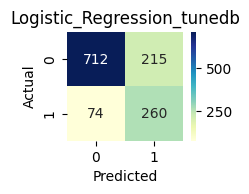

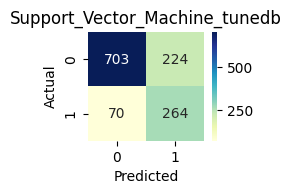

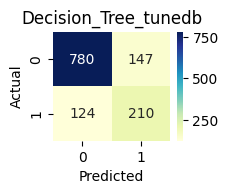

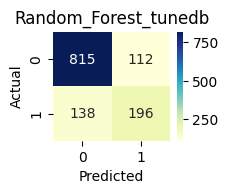

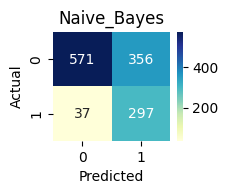

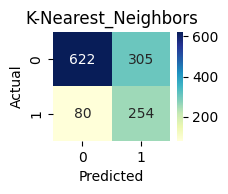

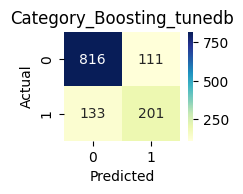

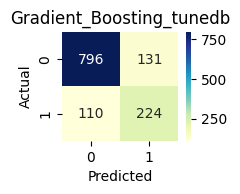

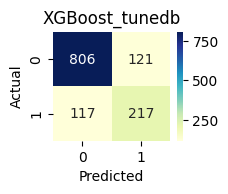

In [160]:
# Creating a loop for visualization
for i, (model_name, confusion_matb) in enumerate(all_confusion_matrices_b.items()):
    plt.subplot(3, 3, i + 1)
    sns.heatmap(confusion_matb, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(model_name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


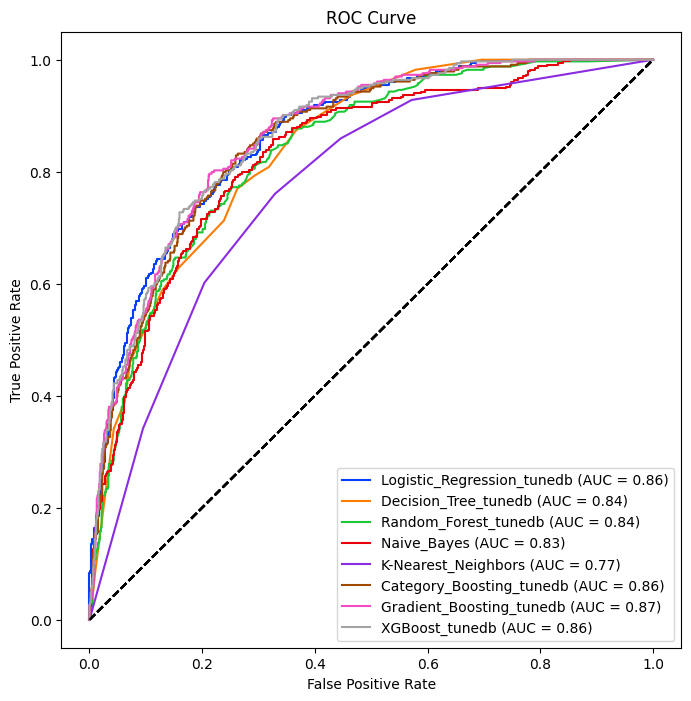

In [161]:
fig, ax = plt.subplots(figsize=(8, 8))
all_confusion_matrix_b = {}

all_roc_data_b = {}

# Iterate over the dictionary items directly
for model_name, pipeline in all_pipelines_b.items():
    
    # Check if the classifier is LinearSVC
    if isinstance(pipeline.named_steps['classifier'], LinearSVC):
        # Fit the pipeline first
        pipeline.fit(X_train, y_train_encode)
        # Wrap LinearSVC with CalibratedClassifierCV
        calibrated_pipeline = CalibratedClassifierCV(pipeline.named_steps['classifier'], method='sigmoid', cv='prefit')
        # Fit the CalibratedClassifierCV instance with training data
        calibrated_pipeline.fit(pipeline.named_steps['preprocessor'].transform(X_train), y_train_encode)
        y_score = calibrated_pipeline.predict_proba(pipeline.named_steps['preprocessor'].transform(X_eval))[:, 1]
    else:
        # For classifiers that have predict_proba directly
        y_score = pipeline.predict_proba(X_eval)[:, 1]
    
        fpr, tpr, thresholds = roc_curve(y_eval_encode, y_score)
        roc_auc = auc(fpr, tpr)
    
    
        roc_data_df = pd.DataFrame({'false_positive_rate': fpr, 'true_positive_rate': tpr, 'thresholds': thresholds})
    
        # Store the ROC data in the dictionary
        all_roc_data_b[model_name] = roc_data_df
        ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_ylabel('True Positive Rate')
        ax.set_xlabel('False Positive Rate')
        ax.set_title('ROC Curve')
        ax.legend(loc="lower right")
plt.show()


Observations

- Gradient Boosting tuned have the highest AUC value of 0.87
- Gradient Boosting model will be used to predict the test data

In [162]:
# retrieving the last 65 rows with our gradient boosting tuned
all_roc_data_b['Gradient_Boosting_tunedb'].tail(65)

,false_positive_rate,true_positive_rate,thresholds
293,0.455232,0.940120,0.142529
294,0.455232,0.943114,0.141153
295,0.467098,0.943114,0.132634
296,0.469256,0.943114,0.131669
297,0.470334,0.943114,0.130614
...,...,...,...
353,0.961165,1.000000,0.015058
354,0.964401,1.000000,0.014860
355,0.969795,1.000000,0.014287
356,0.971953,1.000000,0.014259


- to improve the true positive rate for the best model, we are going to us threshold value of 0.172757

In [163]:
# pipeline for Gradient boost classifier
GBC_pipeline=all_pipelines_b['Gradient_Boosting_tunedb']
GBC_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeliner',
                                                  Pipeline(steps=[('num_imputer',
                                                                   CustomImputer(custom_value=0,
                                                                                 strategy='constant')),
                                                                  ('num_scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeliner',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),...
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=5)),
                ('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x1358d4af0>)),
                ('classifier', GradientBoostingClassifier(random_state=5))])

In [164]:
# Picking a threshold
threshold = 0.172757
# Predict the model
y_pred_proba = GBC_pipeline.predict_proba(X_eval)[:, 1]
# getting a quota and convert to an integer datatype
binary_predictions = (y_pred_proba >= threshold).astype(int)
# confusion matrix 
threshold_matrix = confusion_matrix(y_eval_encode, binary_predictions)


<Axes: >

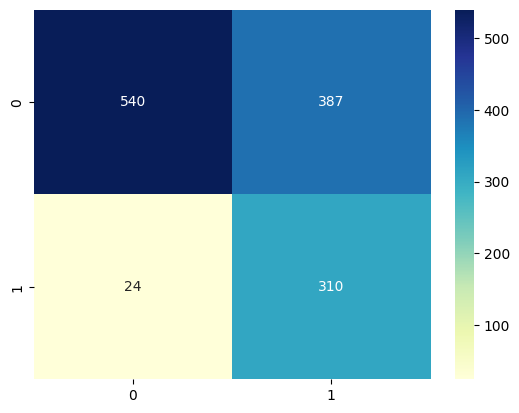

In [165]:
# visualizing heatmap 
sns.heatmap(threshold_matrix, annot=True, fmt='d', cmap='YlGnBu')   

#### Testing the model with the GB_pipeline

In [166]:
# loading the data and creating dataframe
telco_churn_test= pd.read_excel('Dataset/Telco_churn_test.xlsx')
telco_churn_test.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8


In [167]:
# dropping customer id
churn_test_df=telco_churn_test.drop('customerID',axis=1)

In [168]:
# Find columns with whitespace strings
columns_with_whitespace = churn_test_df.columns[churn_test_df.apply(lambda x: x.astype(str).str.contains(' ').any())]

# Print columns with whitespace strings
print("Columns with whitespace strings:", columns_with_whitespace)


Columns with whitespace strings: Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod', 'TotalCharges'],
      dtype='object')


In [169]:
# retrieving rows with blank space
blank=churn_test_df[churn_test_df['TotalCharges']==' ']

In [170]:
# drop rows with blank space in totalcharges 
churn_test_df=churn_test_df.drop(blank.index)

In [171]:
# replacing values 
churn_test_df['SeniorCitizen'] = churn_test_df['SeniorCitizen'].astype(str).apply(lambda x: 'Yes' if '1' in x.lower() else 'No')
churn_test_df = churn_test_df.astype(str).replace('No phone service', 'No')
churn_test_df = churn_test_df.astype(str).replace('No internet service', 'No')

In [172]:
# replacing values
churn_test_df['TotalCharges']=churn_test_df['TotalCharges'].str.replace('nan', '')

In [173]:
# Change datatypes to numeric datatype
churn_test_df['tenure'] = pd.to_numeric(churn_test_df['tenure'])
churn_test_df['MonthlyCharges'] = pd.to_numeric(churn_test_df['MonthlyCharges'])
churn_test_df['TotalCharges'] = pd.to_numeric(churn_test_df['TotalCharges'])

In [174]:
# information about dataframe
churn_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1997 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1997 non-null   object 
 1   SeniorCitizen     1997 non-null   object 
 2   Partner           1997 non-null   object 
 3   Dependents        1997 non-null   object 
 4   tenure            1997 non-null   int64  
 5   PhoneService      1997 non-null   object 
 6   MultipleLines     1997 non-null   object 
 7   InternetService   1997 non-null   object 
 8   OnlineSecurity    1997 non-null   object 
 9   OnlineBackup      1997 non-null   object 
 10  DeviceProtection  1997 non-null   object 
 11  TechSupport       1997 non-null   object 
 12  StreamingTV       1997 non-null   object 
 13  StreamingMovies   1997 non-null   object 
 14  Contract          1997 non-null   object 
 15  PaperlessBilling  1997 non-null   object 
 16  PaymentMethod     1997 non-null   object 
 17  

**Predicting the top 3 models with higher AUC**

In [175]:
# using GBC pipeline to predict our test dataframe
GB_predict_churn = GBC_pipeline.predict(churn_test_df)
GB_predict_churn 

array([1, 0, 0, ..., 1, 0, 0])

In [176]:
# Inverse transforming our churn from test data
encoder.inverse_transform(GB_predict_churn)

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [177]:
# adding a column for our encoded churn
churn_test_df['GB_churn']=encoder.inverse_transform(GB_predict_churn)

In [178]:
# retrieving sample
churn_test_df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,GB_churn
0,Male,No,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1827,Female,No,No,Yes,16,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,81.00,1312.15,Yes
17,Female,No,Yes,Yes,18,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check,61.50,1087.45,No
1193,Male,No,No,No,10,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),19.75,208.25,No
1277,Female,No,No,No,6,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,20.95,109.50,Yes


**Predicting with XGBoost**

In [179]:
# pipeline for XGboost
XGBoost_tunedb=all_pipelines_b['XGBoost_tunedb']
XGBoost_tunedb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeliner',
                                                  Pipeline(steps=[('num_imputer',
                                                                   CustomImputer(custom_value=0,
                                                                                 strategy='constant')),
                                                                  ('num_scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('cat_pipeliner',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, random_state=5, ...))])

In [180]:
# retreiving the last 65 rows from our dataframe with tpr and fpr
all_roc_data_b['XGBoost_tunedb'].tail(65)

,false_positive_rate,true_positive_rate,thresholds
284,0.405609,0.931138,0.164172
285,0.405609,0.934132,0.162861
286,0.430421,0.934132,0.146238
287,0.430421,0.937126,0.145016
288,0.459547,0.937126,0.122418
...,...,...,...
344,0.980583,1.000000,0.002955
345,0.982740,1.000000,0.002805
346,0.989213,1.000000,0.002425
347,0.991370,1.000000,0.002320


In [181]:
# Threshold
threshold = 0.145171
# Predict the model
y_pred_proba_xgb = XGBoost_tunedb.predict_proba(X_eval)[:, 1]
# getting a quota and convert to an integer datatype
binary_predictions = (y_pred_proba_xgb >= threshold).astype(int)
# confusion matrix
threshold_matrix_xgb = confusion_matrix(y_eval_encode, binary_predictions)

<Axes: >

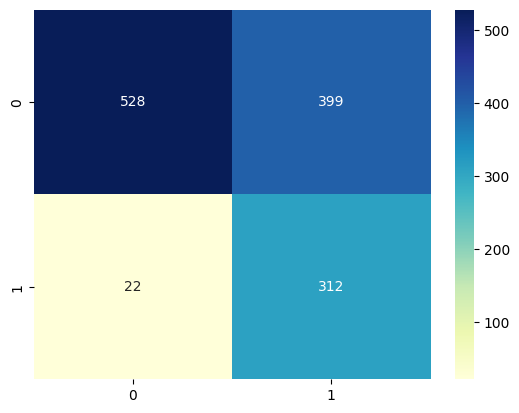

In [182]:
# visualizing with heatmap
sns.heatmap(threshold_matrix_xgb, annot=True, fmt='d', cmap='YlGnBu')  

In [183]:
# predict the dataframe with model
XGB_predict_churn = XGBoost_tunedb.predict(churn_test_df)
XGB_predict_churn

array([1, 0, 0, ..., 1, 0, 0])

In [184]:
# Inverse transforming our churn from test data
encoder.inverse_transform(XGB_predict_churn).shape


(1997,)

In [185]:
# Inverse transforming our churn from test data
XG_churn=encoder.inverse_transform(XGB_predict_churn)


In [186]:
# creatinga column to contain XG churn
churn_test_df['XGb_churn']=XG_churn

In [187]:
# retrieve the first five rows
churn_test_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,GB_churn,XGb_churn
0,Male,No,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes,Yes
1,Male,No,No,No,9,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.40,181.80,No,No
2,Male,No,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No,No
3,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,No,No
4,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes,Yes


Persit the model

In [188]:
# importing the models
import joblib

for model_name, pipeline in all_pipelines_b.items():
    joblib.dump(model_name, f'model/{model_name}.joblib')


## Key Insights

- **Most non-senior Citizens are likely to churn compared to Senior citizens**
- **Customers using mailed or Electronic checks payment methods are more likely to churn**
- **Churning did not depend on gender**

### Recommendation

- We recommend the telco target non senior citizens with promotions and incentives to prevent them from churning
- We observed among the payment methods, all payment methods that are automatic had lower churn rate, hence telco must encourage or promote automatic payment